In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import coint, adfuller, kpss
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as rg
from sklearn.model_selection import train_test_split
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
from scipy.stats import skew,kurtosis,stats
from statsmodels.stats.stattools import jarque_bera
from scipy.spatial import distance
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
df = yf.download(tickers='BTC-USD LTC-USD ETH-USD DOGE-USD USDT-USD',start = '2016-01-01', end='2021-06-30', interval = '1d')

[*********************100%***********************]  5 of 5 completed


In [4]:
df.to_csv('pairstrading.csv')
df.to_csv('pairstrading.csv',index=True)
df.to_csv(r'C:\Users\anoop\Desktop\New folder\Westminster\dissertation\pairstrading.csv')
df.to_csv(r'C:\Users\anoop\Desktop\New folder\Westminster\dissertation\pairstrading.csv',index = True)
data = pd.read_csv("pairstrading.csv")
data.to_excel("pairstrading.xlsx",index = None,header=True)

In [3]:
df = pd.read_excel(r'C:\Users\anoop\Desktop\New folder\Westminster\dissertation\pairstrading.xlsx')

In [4]:
print(df)

            Date  BTC-USD Adj Close  DOGE-USD Adj Close  ETH-USD Adj Close  \
0     2015-12-31         430.566986            0.000151           0.933542   
1     2016-01-01         434.334015            0.000154           0.948024   
2     2016-01-02         433.437988            0.000151           0.937124   
3     2016-01-03         430.010986            0.000146           0.971905   
4     2016-01-04         433.091003            0.000144           0.954480   
...          ...                ...                 ...                ...   
1999  2021-06-25       31637.779297            0.239153        1813.217285   
2000  2021-06-26       32186.277344            0.244784        1829.239258   
2001  2021-06-27       34649.644531            0.264450        1978.894653   
2002  2021-06-28       34434.335938            0.256857        2079.657471   
2003  2021-06-29       35867.777344            0.262769        2160.768311   

      LTC-USD Adj Close  USDT-USD Adj Close  BTC-USD Close  DOG

In [5]:
data = pd.DataFrame(df)
data

Date  BTC-USD Adj Close  DOGE-USD Adj Close  ETH-USD Adj Close  \
0     2015-12-31         430.566986            0.000151           0.933542   
1     2016-01-01         434.334015            0.000154           0.948024   
2     2016-01-02         433.437988            0.000151           0.937124   
3     2016-01-03         430.010986            0.000146           0.971905   
4     2016-01-04         433.091003            0.000144           0.954480   
...          ...                ...                 ...                ...   
1999  2021-06-25       31637.779297            0.239153        1813.217285   
2000  2021-06-26       32186.277344            0.244784        1829.239258   
2001  2021-06-27       34649.644531            0.264450        1978.894653   
2002  2021-06-28       34434.335938            0.256857        2079.657471   
2003  2021-06-29       35867.777344            0.262769        2160.768311   

      LTC-USD Adj Close  USDT-USD Adj Close  BTC-USD Close  DOGE-USD Close  \
0              3.480170            1.000000     430.566986        0.000151   
1              3.508980            1.000000     434.334015        0.000154   
2              3.502160            1.000000     433.437988        0.000151   
3              3.483070            1.000000     430.010986        0.000146   
4              3.495390            1.000000     433.091003        0.000144   
...                 ...                 ...            ...             ...   
1999         125.687744            0.999845   31637.779297        0.239153   
2000         126.657257            1.001214   32186.277344        0.244784   
2001         132.347885            1.000642   34649.644531        0.264450   
2002         137.370850            0.999928   34434.335938        0.256857   
2003         143.702911            1.000024   35867.777344        0.262769   

      ETH-USD Close  LTC-USD Close  ...  BTC-USD Open  DOGE-USD Open  \
0          0.933542       3.480170  ...    425.875000       0.000151   
1          0.948024       3.508980  ...    430.721008       0.000150   
2          0.937124       3.502160  ...    434.622009       0.000155   
3          0.971905       3.483070  ...    433.578003       0.000149   
4          0.954480       3.495390  ...    430.061005       0.000146   
...             ...            ...  ...           ...            ...   
1999    1813.217285     125.687744  ...  34659.105469       0.263480   
2000    1829.239258     126.657257  ...  31594.664062       0.237673   
2001    1978.894653     132.347885  ...  32287.523438       0.246045   
2002    2079.657471     137.370850  ...  34679.121094       0.264918   
2003    2160.768311     143.702911  ...  34475.558594       0.257061   

      ETH-USD Open  LTC-USD Open  USDT-USD Open  BTC-USD Volume  \
0         0.912098      3.459300       1.000000        45996600   
1         0.933712      3.479520       1.000000        36278900   
2         0.947401      3.515280       1.000000        30096600   
3         0.938430      3.504000       1.000000        39633800   
4         0.972045      3.479100       1.000000        38477500   
...            ...           ...            ...             ...   
1999   1989.215820    134.596222       1.000093     40230904226   
2000   1810.884277    125.393433       0.999855     38585385521   
2001   1830.996948    126.893791       1.001260     35511640894   
2002   1981.386475    132.592697       1.000689     33892523752   
2003   2083.448730    137.613098       0.999951     37901460044   

      DOGE-USD Volume  ETH-USD Volume  LTC-USD Volume  USDT-USD Volume  
0               95446          663994         2667620             6995  
1              105224          206062         2791170             4876  
2               90477          255504         3020260             4701  
3              104005          407632         2406150             1389  
4               92160          346245         3309740            81182  
...               ...         

In [6]:
data = df[['BTC-USD Adj Close','LTC-USD Adj Close','ETH-USD Adj Close','DOGE-USD Adj Close','USDT-USD Adj Close']]
data.round(4)
data1 = np.log(data)
data1

BTC-USD Adj Close  LTC-USD Adj Close  ETH-USD Adj Close  \
0              6.065103           1.247081          -0.068769   
1              6.073814           1.255325          -0.053375   
2              6.071749           1.253380          -0.064940   
3              6.063811           1.247914          -0.028497   
4              6.070948           1.251445          -0.046589   
...                 ...                ...                ...   
1999          10.362107           4.833801           7.502858   
2000          10.379295           4.841485           7.511655   
2001          10.453043           4.885434           7.590294   
2002          10.446809           4.922684           7.639958   
2003          10.487595           4.967748           7.678219   

      DOGE-USD Adj Close  USDT-USD Adj Close  
0              -8.798231            0.000000  
1              -8.778558            0.000000  
2              -8.798231            0.000000  
3              -8.831904            0.000000  
4              -8.845697            0.000000  
...                  ...                 ...  
1999           -1.430652           -0.000155  
2000           -1.407379            0.001213  
2001           -1.330103            0.000642  
2002           -1.359236           -0.000072  
2003           -1.336480            0.000024  

[2004 rows x 5 columns]

In [7]:
data1.tail()

BTC-USD Adj Close  LTC-USD Adj Close  ETH-USD Adj Close  \
1999          10.362107           4.833801           7.502858   
2000          10.379295           4.841485           7.511655   
2001          10.453043           4.885434           7.590294   
2002          10.446809           4.922684           7.639958   
2003          10.487595           4.967748           7.678219   

      DOGE-USD Adj Close  USDT-USD Adj Close  
1999           -1.430652           -0.000155  
2000           -1.407379            0.001213  
2001           -1.330103            0.000642  
2002           -1.359236           -0.000072  
2003           -1.336480            0.000024

# Litecoin Annualized return

In [8]:
data_return = np.log(data['LTC-USD Adj Close']/data['LTC-USD Adj Close'].shift(1))
data_return.dropna()

1       0.008244
2      -0.001945
3      -0.005466
4       0.003531
5      -0.007385
          ...   
1999   -0.067649
2000    0.007684
2001    0.043949
2002    0.037250
2003    0.045064
Name: LTC-USD Adj Close, Length: 2003, dtype: float64

In [9]:
annualized_return = ((1 + data_return)**(12/54)-1).sum()
print(annualized_return)

0.24435559453097766


# Ethereum Annualized retrun

In [10]:
data_return = np.log(data['ETH-USD Adj Close']/data['ETH-USD Adj Close'].shift(1))
data_return.dropna()

1       0.015394
2      -0.011564
3       0.036442
4      -0.018091
5      -0.004519
          ...   
1999   -0.092256
2000    0.008797
2001    0.078638
2002    0.049665
2003    0.038261
Name: ETH-USD Adj Close, Length: 2003, dtype: float64

In [11]:
annualized_return = ((1 + data_return)**(12/54)-1).sum()
print(annualized_return)

1.0869184464777608


In [12]:
data.describe()

BTC-USD Adj Close  LTC-USD Adj Close  ETH-USD Adj Close  \
count        2004.000000        2004.000000        2004.000000   
mean         9698.091237          69.858125         405.271687   
std         12618.215395          67.803299         605.290208   
min           364.330994           2.996780           0.933542   
25%          1807.910034          24.586807          90.738199   
50%          6772.304932          52.936567         211.373520   
75%         10027.713623          88.096319         402.605759   
max         63503.457031         386.450775        4168.701172   

       DOGE-USD Adj Close  USDT-USD Adj Close  
count         2004.000000         2004.000000  
mean             0.017975            1.001095  
std              0.071560            0.009059  
min              0.000135            0.913595  
25%              0.000933            0.999999  
50%              0.002482            1.000373  
75%              0.003370            1.002856  
max              0.684777            1.077880

In [13]:
data.skew()

BTC-USD Adj Close     2.536106
LTC-USD Adj Close     1.566900
ETH-USD Adj Close     2.925083
DOGE-USD Adj Close    5.434601
USDT-USD Adj Close   -2.867930
dtype: float64

In [14]:
data.kurtosis()

BTC-USD Adj Close      6.117237
LTC-USD Adj Close      2.543863
ETH-USD Adj Close      9.510971
DOGE-USD Adj Close    31.434917
USDT-USD Adj Close    31.132264
dtype: float64

### train test split 

In [15]:
train_data, test_data = train_test_split(data1, test_size=0.2, shuffle=False)

In [16]:
# quick view of head and tail of train set
train_data.head(2).append(train_data.tail(2))

BTC-USD Adj Close  LTC-USD Adj Close  ETH-USD Adj Close  \
0              6.065103           1.247081          -0.068769   
1              6.073814           1.255325          -0.053375   
1601           9.161463           3.788094           5.347568   
1602           9.114023           3.755198           5.297735   

      DOGE-USD Adj Close  USDT-USD Adj Close  
0              -8.798231            0.000000  
1              -8.778558            0.000000  
1601           -5.988270           -0.001053  
1602           -5.997483            0.001999

## Pearson correlation to get the basic idea about the relationship

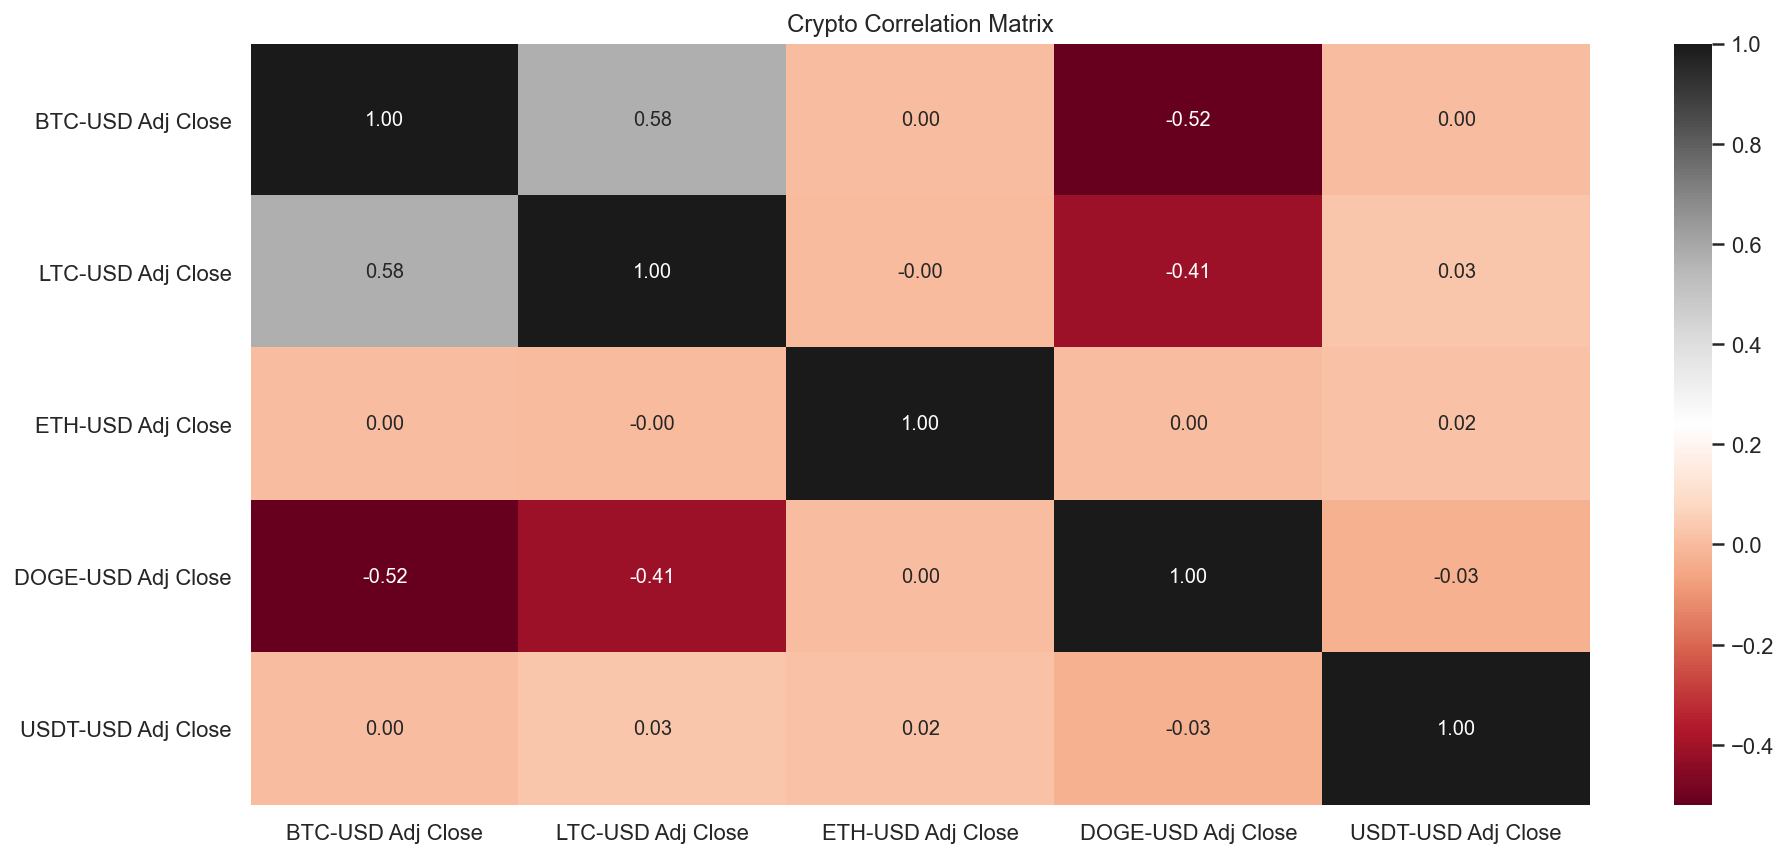

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(train_data.pct_change().corr(method ='pearson'), ax=ax, cmap='RdGy', annot=True, fmt=".2f")
#spearman
ax.set_title('Crypto Correlation Matrix')
plt.show('images/chart1')

## function to find cointegrated pairs

In [18]:
def find_cointegrated_pairs(data1):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

### calculate p-values and plot as a heatmap

[('BTC-USD Adj Close', 'ETH-USD Adj Close'), ('BTC-USD Adj Close', 'DOGE-USD Adj Close'), ('LTC-USD Adj Close', 'ETH-USD Adj Close')]


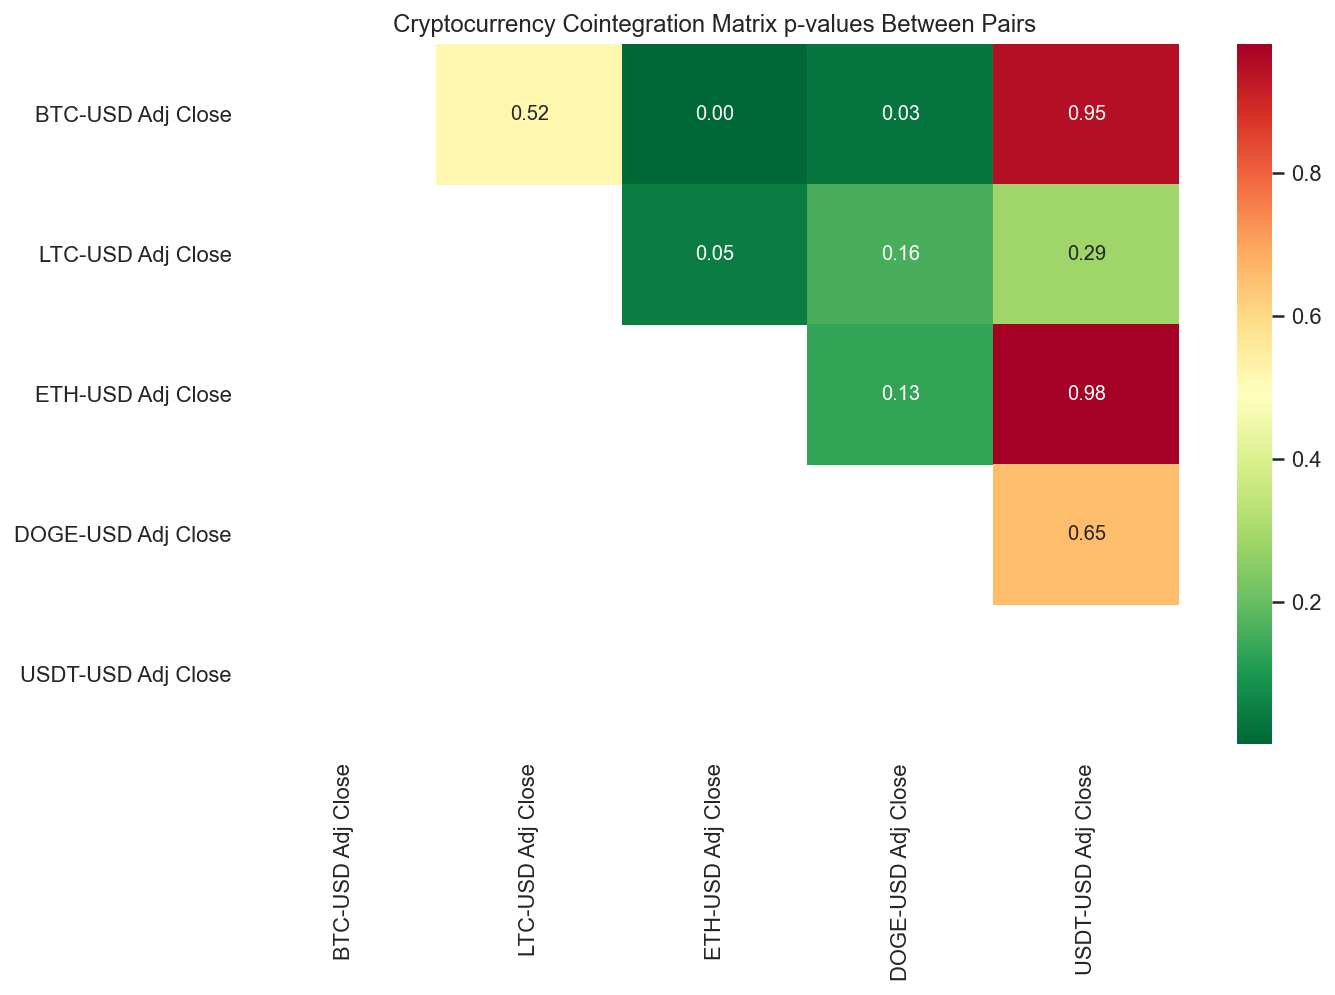

In [19]:
pvalues, pairs = find_cointegrated_pairs(train_data)
print(pairs)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = train_data.columns,
                yticklabels = train_data.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Cryptocurrency Cointegration Matrix p-values Between Pairs')
plt.tight_layout()
plt.show('images/chart2')

# Perform a Cointegration test for the Selected Pair BTC & ETH

###  Pair to test strategy

In [20]:
BTC = 'BTC-USD Adj Close'
ETH = 'ETH-USD Adj Close'

### Create a train dataframe of 2 assets

In [21]:
train = pd.DataFrame()
train['BTC'] = train_data[BTC]
train['ETH'] = train_data[ETH]

### Visualize closing prices

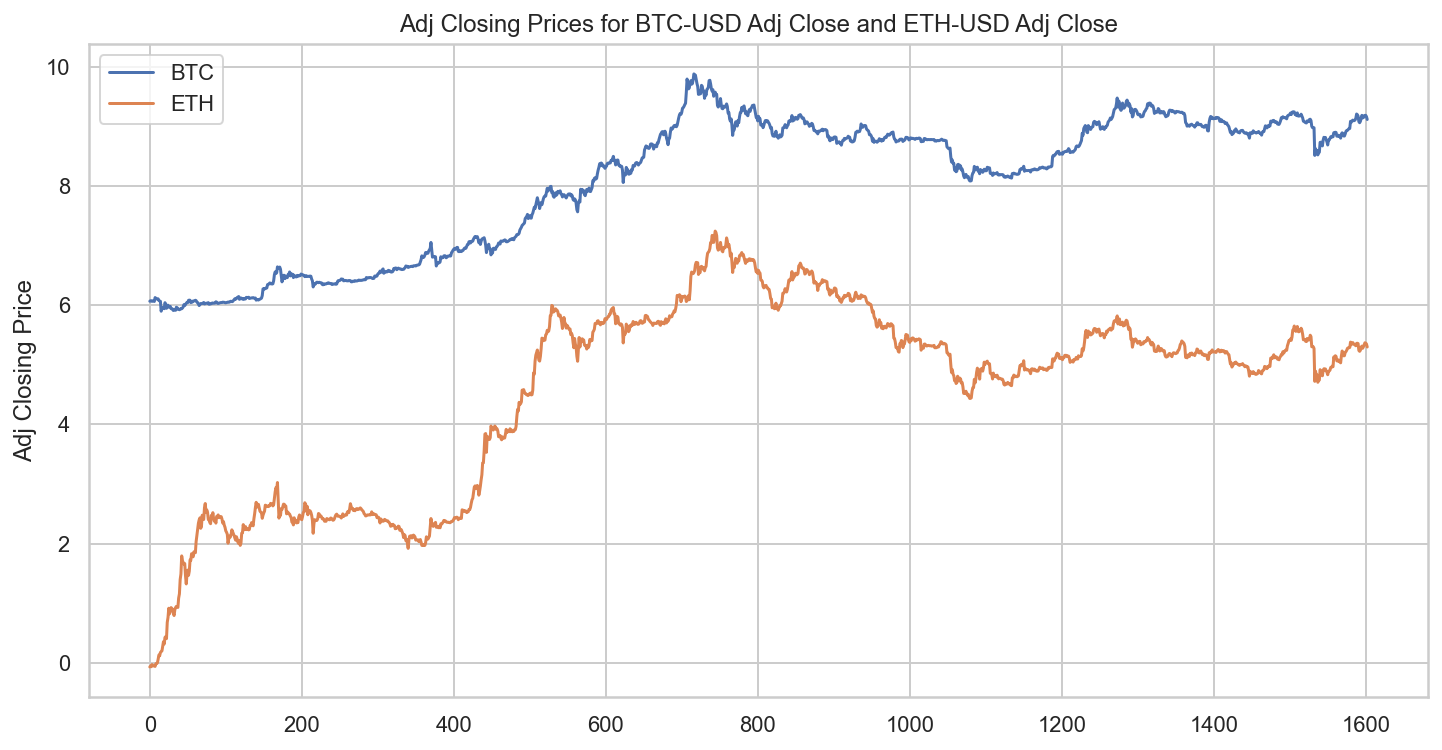

In [22]:
ax = train[['BTC','ETH']].plot(figsize=(12, 6), title = 'Adj Closing Prices for {} and {}'.format(BTC,ETH))
ax.set_ylabel("Adj Closing Price")
ax.grid(True);
plt.show('images/chart3')

### Run OLS regression

In [23]:
model= sm.OLS(train.ETH, train.BTC).fit()

### Print regression summary results

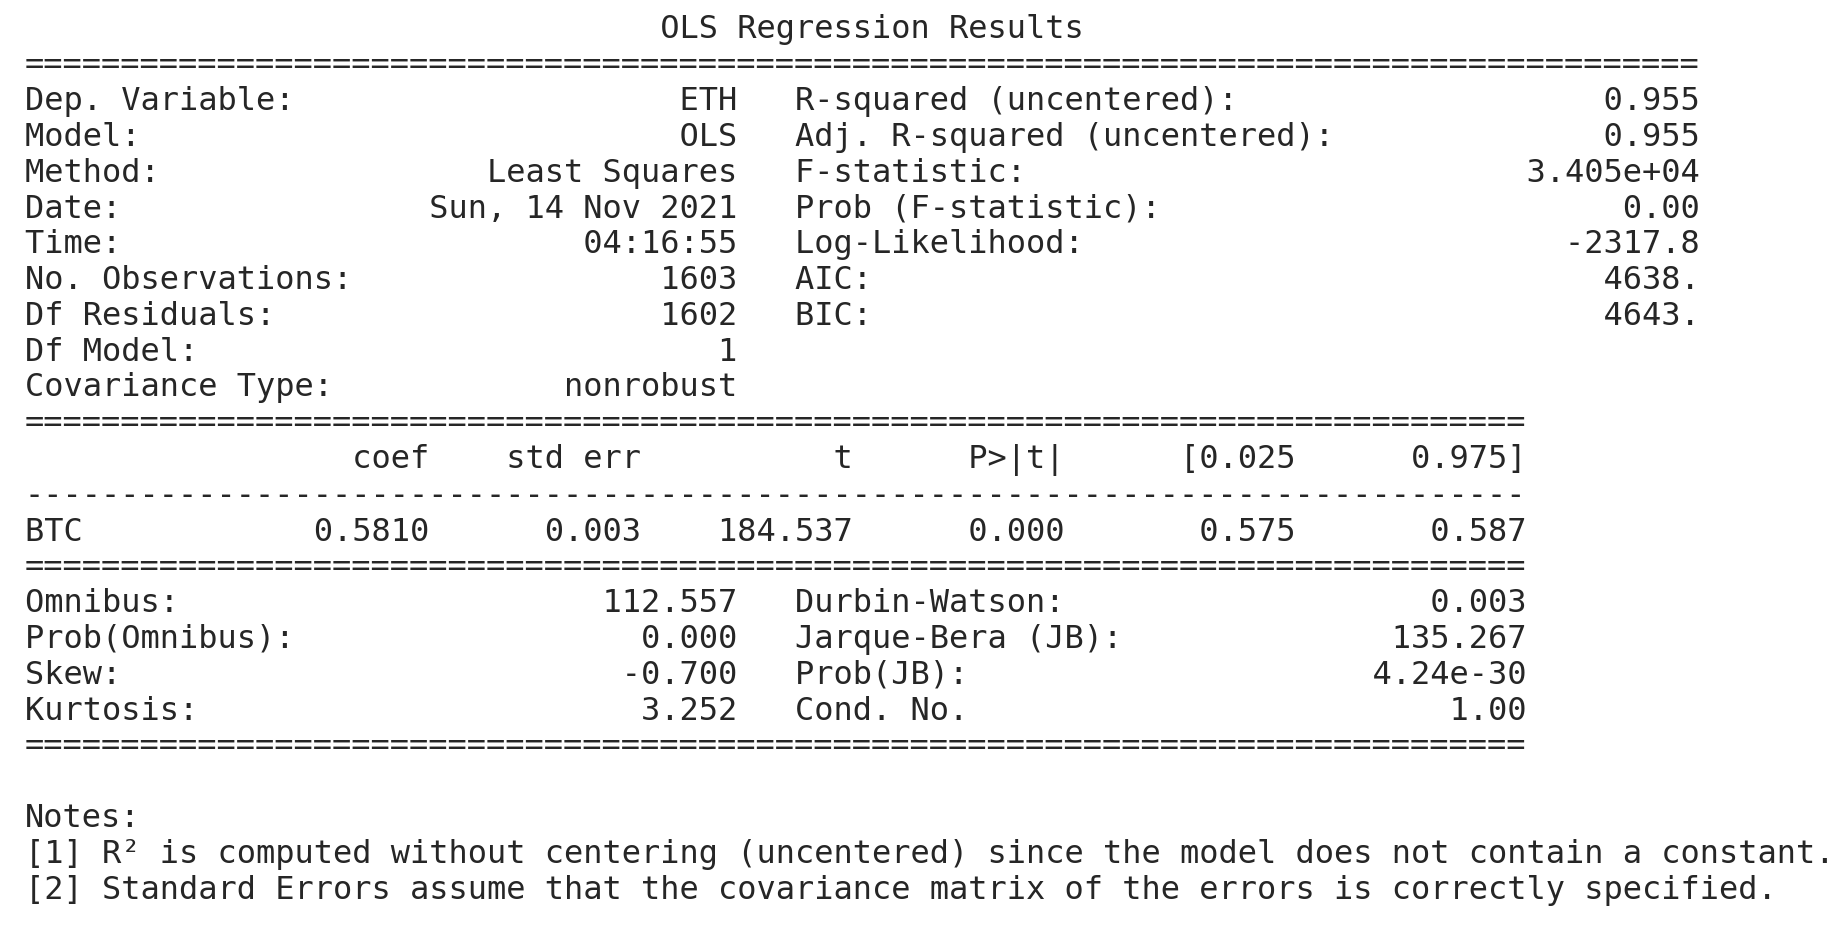

In [24]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)
plt.show('images/chart4');

In [25]:
print('Hedge Ratio = ', model.params[0])

Hedge Ratio =  0.5809922430957564


### Calculate spread

In [26]:
spread = train.ETH - model.params[0] * train.BTC

### Plot the spread

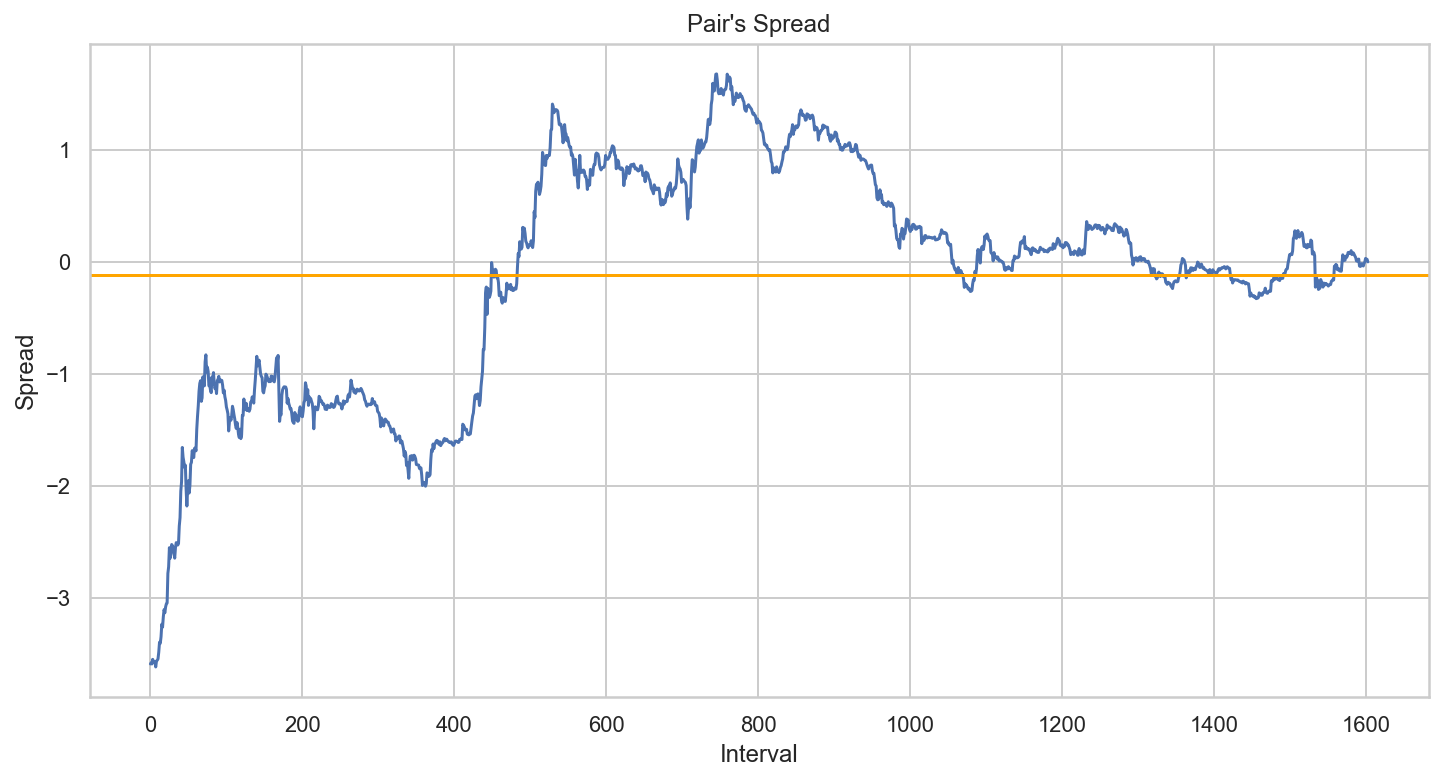

In [27]:
ax = spread.plot(figsize=(12, 6), title = "Pair's Spread")
plt.axhline(spread.mean(),color='orange')
ax.set_ylabel("Spread")
ax.set_xlabel("Interval")
ax.grid(True);
plt.show('images/chart5');

### Conduct Augmented Dickey-Fuller test

In [28]:
adf = adfuller(spread, maxlag = 1)
print('Critical Value = ', adf[0])

Critical Value =  -3.784316060390863


### probablity critical values

In [29]:
print(adf[4])

{'1%': -3.4344410778805936, '5%': -2.86334697077965, '10%': -2.567731995333179}


In [30]:
test = adfuller(spread,maxlag = 1)
test

(-3.784316060390863,
 0.003071920723767392,
 1,
 1601,
 {'1%': -3.4344410778805936,
  '5%': -2.86334697077965,
  '10%': -2.567731995333179},
 -4932.01096710526)

## Generate Trading Signals using z-score

### calculate z-score

In [31]:
def zscore(series):
    return (series - series.rolling(window = 30).mean()) / series.rolling(window=30).std()

### create a dataframe for trading signals

In [32]:
signals = pd.DataFrame()
signals['BTC'] = test_data[BTC] 
signals['ETH'] = test_data[ETH]
ratios = signals.BTC / signals.ETH

### calculate z-score and define upper and lower thresholds

In [33]:
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])

### create signal - short if z-score is greater than upper limit else long

In [34]:
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > \
                                 signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)

### we take the first order difference to obtain portfolio position in that stock

In [35]:
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

### visualize z-score and upper and lower thresholds

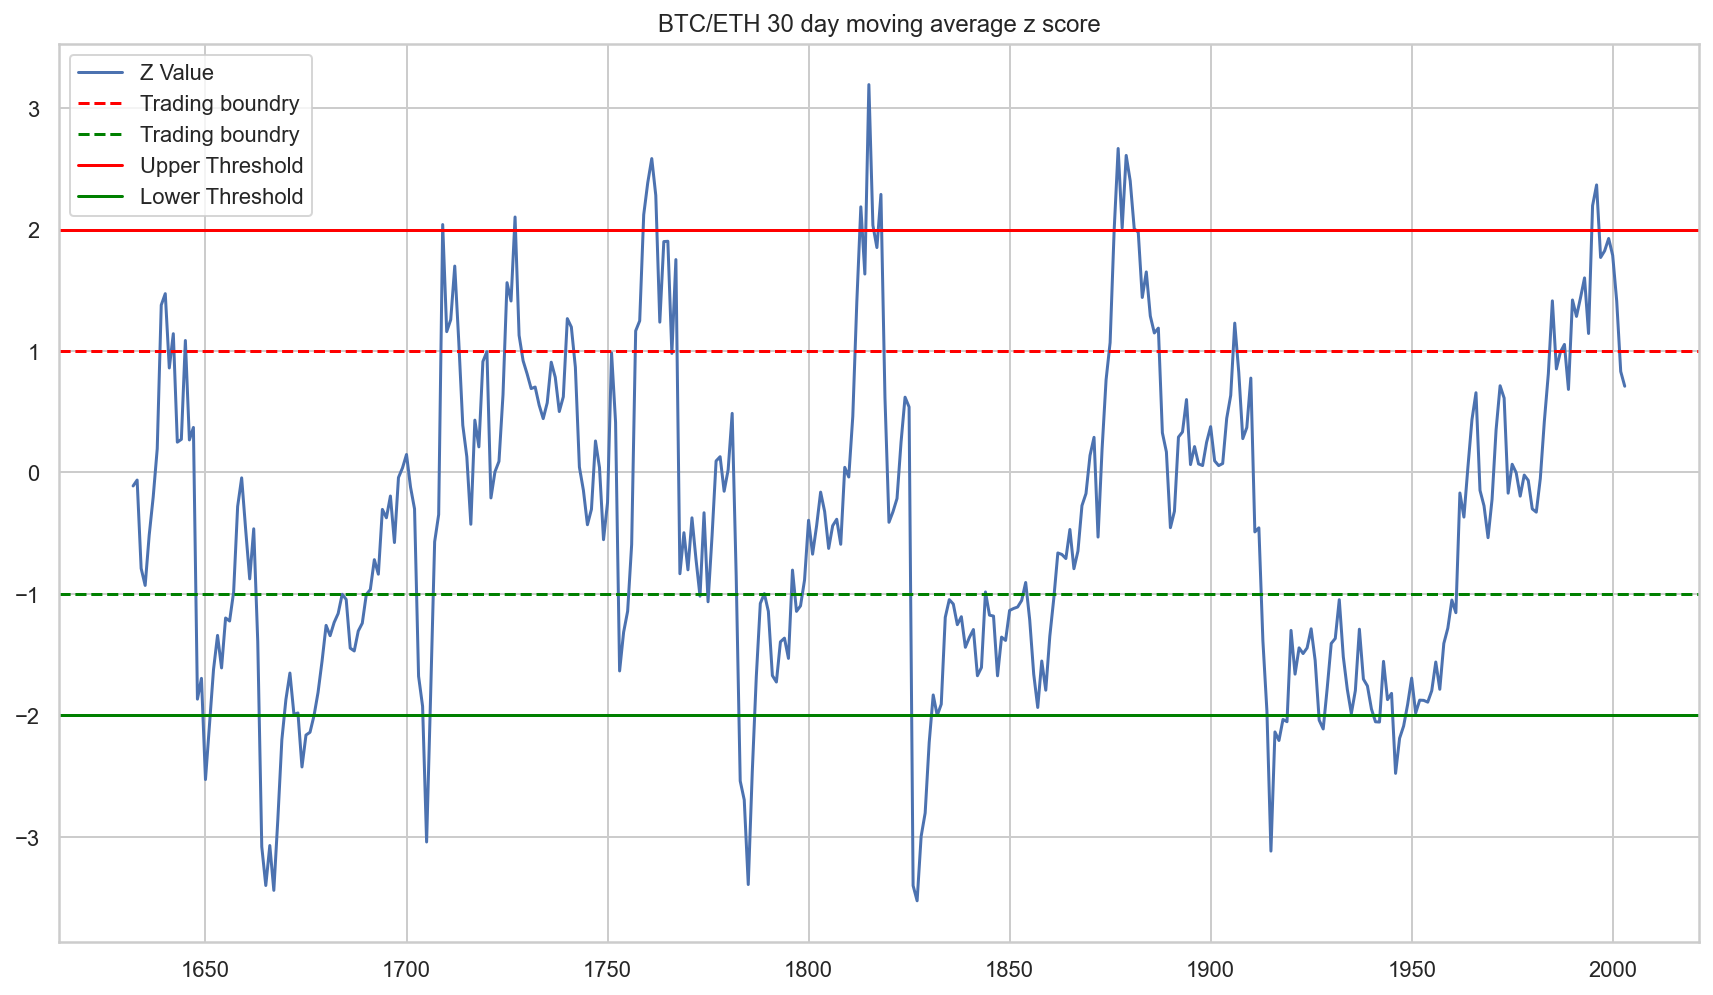

In [36]:
signals['z'].plot(label="Z Value ")
plt.title("BTC/ETH 30 day moving average z score")
plt.axhline((1), color="red",linestyle = '--', label="Trading boundry")
plt.axhline((-1), color="green",linestyle ='--' , label="Trading boundry")
plt.axhline((2), color="red", label="Upper Threshold")
plt.axhline((-2), color="green",label="Lower Threshold")
plt.legend()
plt.tight_layout()
plt.show('images/chart6');

### verify dataframe head and tail

In [37]:
signals.head(10).append(signals.tail(10))

BTC       ETH         z  z upper limit  z lower limit  signals1  \
1603   9.125063  5.333536       NaN       0.925425      -1.726118         0   
1604   9.127968  5.340871       NaN       0.925425      -1.726118         0   
1605   9.081412  5.310099       NaN       0.925425      -1.726118         0   
1606   9.094585  5.324569       NaN       0.925425      -1.726118         0   
1607   9.086482  5.307784       NaN       0.925425      -1.726118         0   
1608   9.124893  5.341681       NaN       0.925425      -1.726118         0   
1609   9.161754  5.392902       NaN       0.925425      -1.726118         0   
1610   9.152618  5.396692       NaN       0.925425      -1.726118         0   
1611   9.179924  5.490365       NaN       0.925425      -1.726118         0   
1612   9.154940  5.442313       NaN       0.925425      -1.726118         0   
1994  10.482858  7.717068  1.144112       0.925425      -1.726118        -1   
1995  10.363336  7.543510  2.196553       0.925425      -1.726118        -1   
1996  10.389170  7.536337  2.367261       0.925425      -1.726118        -1   
1997  10.425936  7.595757  1.769998       0.925425      -1.726118        -1   
1998  10.453412  7.595114  1.824592       0.925425      -1.726118        -1   
1999  10.362107  7.502858  1.926215       0.925425      -1.726118        -1   
2000  10.379295  7.511655  1.787451       0.925425      -1.726118        -1   
2001  10.453043  7.590294  1.411895       0.925425      -1.726118        -1   
2002  10.446809  7.639958  0.831285       0.925425      -1.726118         0   
2003  10.487595  7.678219  0.709865       0.925425      -1.726118         0   

      positions1  signals2  positions2  
1603         NaN         0         NaN  
1604         0.0         0         0.0  
1605         0.0         0         0.0  
1606         0.0         0         0.0  
1607         0.0         0         0.0  
1608         0.0         0         0.0  
1609         0.0         0         0.0  
1610         0.0         0         0.0  
1611         0.0         0         0.0  
1612         0.0         0         0.0  
1994         0.0         1         0.0  
1995         0.0         1         0.0  
1996         0.0         1         0.0  
1997         0.0         1         0.0  
1998         0.0         1         0.0  
1999         0.0         1         0.0  
2000         0.0         1         0.0  
2001         0.0         1         0.0  
2002         1.0         0        -1.0  
2003         0.0         0         0.0

### check portfolio position

In [38]:
signals[signals.signals1 != 0].head()

BTC       ETH         z  z upper limit  z lower limit  signals1  \
1639  9.110011  5.406991  1.378344       0.925425      -1.726118        -1   
1640  9.120807  5.417642  1.472068       0.925425      -1.726118        -1   
1642  9.120196  5.421928  1.142544       0.925425      -1.726118        -1   
1645  9.114634  5.417819  1.086624       0.925425      -1.726118        -1   
1648  9.145852  5.486912 -1.865733       0.925425      -1.726118         1   

      positions1  signals2  positions2  
1639        -1.0         1         1.0  
1640         0.0         1         0.0  
1642        -1.0         1         1.0  
1645        -1.0         1         1.0  
1648         1.0        -1        -1.0

In [39]:
signals[signals.positions1 != 0].head().append(signals[signals.positions1 != 0].tail())

BTC       ETH         z  z upper limit  z lower limit  signals1  \
1603   9.125063  5.333536       NaN       0.925425      -1.726118         0   
1639   9.110011  5.406991  1.378344       0.925425      -1.726118        -1   
1641   9.125964  5.430200  0.860339       0.925425      -1.726118         0   
1642   9.120196  5.421928  1.142544       0.925425      -1.726118        -1   
1643   9.130033  5.442909  0.249539       0.925425      -1.726118         0   
1986  10.478766  7.771693  0.852350       0.925425      -1.726118         0   
1987  10.573823  7.827397  0.991527       0.925425      -1.726118        -1   
1989  10.606740  7.867464  0.683681       0.925425      -1.726118         0   
1990  10.554433  7.769659  1.420083       0.925425      -1.726118        -1   
2002  10.446809  7.639958  0.831285       0.925425      -1.726118         0   

      positions1  signals2  positions2  
1603         NaN         0         NaN  
1639        -1.0         1         1.0  
1641         1.0         0        -1.0  
1642        -1.0         1         1.0  
1643         1.0         0        -1.0  
1986         1.0         0        -1.0  
1987        -1.0         1         1.0  
1989         1.0         0        -1.0  
1990        -1.0         1         1.0  
2002         1.0         0        -1.0

In [40]:
signals.loc[signals['positions1'] == 1].index
signals['ETH'][signals['positions1'] == 1].value_counts()

6.119680    1
6.525971    1
5.963629    1
5.862084    1
7.867464    1
5.908360    1
7.639958    1
6.075529    1
5.569072    1
7.768428    1
7.449295    1
7.374854    1
7.988167    1
8.269411    1
5.434046    1
5.486912    1
7.415121    1
5.812896    1
7.589476    1
6.882958    1
8.313621    1
5.971746    1
5.864091    1
7.837744    1
6.308984    1
7.797745    1
7.411400    1
5.430200    1
5.508051    1
5.442909    1
7.771693    1
Name: ETH, dtype: int64

### visualize trading signals and position & plot two different assets

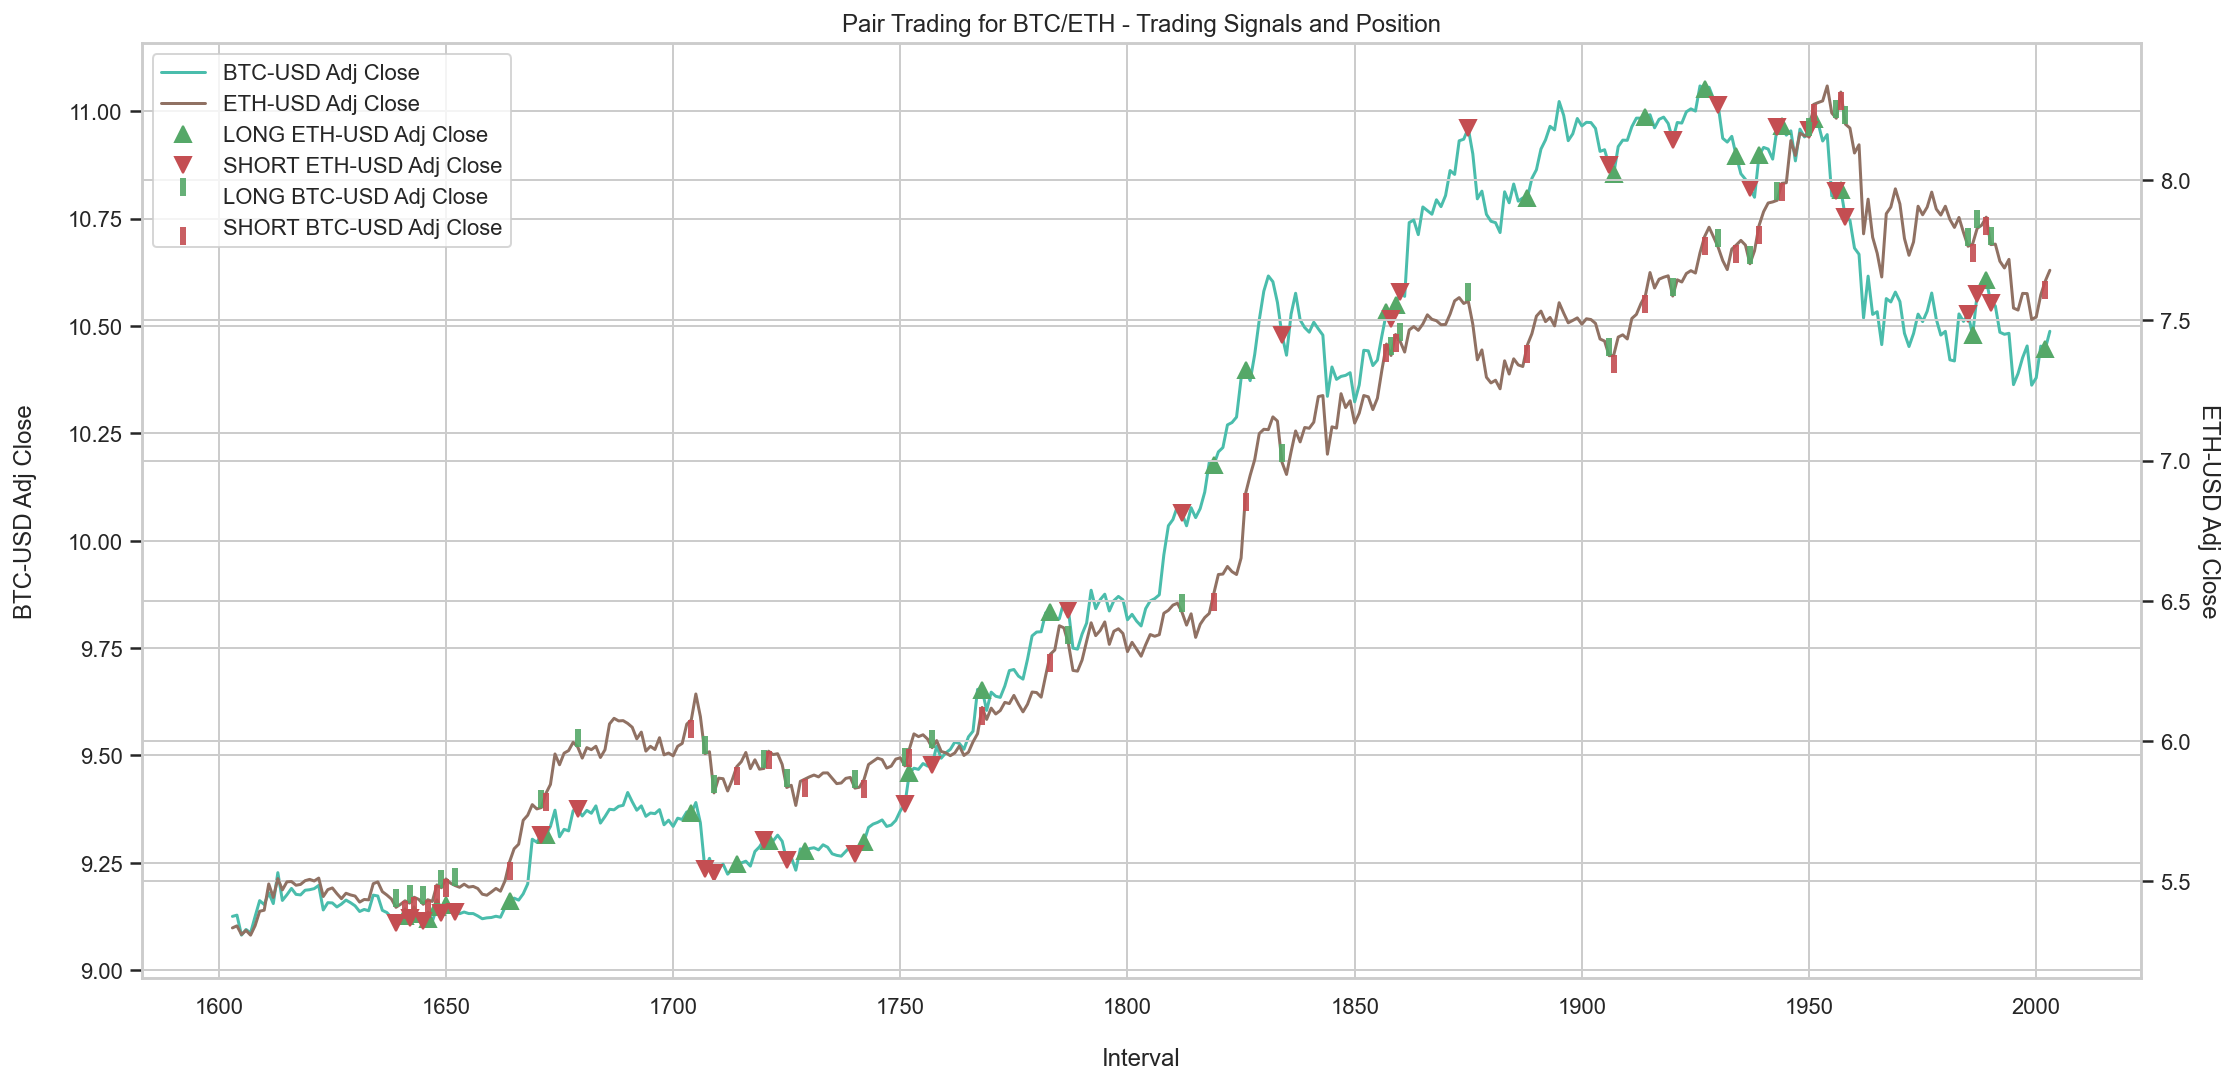

In [41]:
fig=plt.figure(figsize=(15.6,7.6))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()


l1, = bx.plot(signals['BTC'], c='#4abdac')
l2, = bx2.plot(signals['ETH'], c='#907163')

u1, = bx.plot(signals['BTC'][signals['positions1'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=1)

d1, = bx.plot(signals['BTC'][signals['positions1'] == -1], lw=0,marker='v',markersize=8, c='r',alpha=1)

u2, = bx2.plot(signals['ETH'][signals['positions2'] == 1], lw=0,marker=2,markersize=9, c='g',alpha=0.9, markeredgewidth=3)

d2, = bx2.plot(signals['ETH'][signals['positions2'] == -1], lw=0,marker=3,markersize=9, c='r',alpha=0.9,markeredgewidth=3)

bx.set_ylabel(BTC,)
bx2.set_ylabel(ETH, rotation=270)
bx.yaxis.labelpad=15
bx2.yaxis.labelpad=15
bx.set_xlabel('Interval')
bx.xaxis.labelpad=15

plt.legend([l1,l2,u1,d1,u2,d2], [BTC,ETH,'LONG {}'.format(ETH),
           'SHORT {}'.format(ETH),
           'LONG {}'.format(BTC),
           'SHORT {}'.format(BTC)], loc ='best')

plt.title('Pair Trading for BTC/ETH - Trading Signals and Position')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show('images/chart7');

# Portfolio Profit and Loss Calculation for Selected pair BTC & ETH

### Initial capital to calculate the actual pnl. Shares to buy for each position

In [42]:
initial_capital = 50000

positions1 = initial_capital// max(signals['BTC'])
positions2 = initial_capital// max(signals['ETH'])

### since there are two assets, we calculate each asset Pnl separately and in the end we aggregate them into one portfolio

In [43]:
portfolio = pd.DataFrame()
portfolio['BTC'] = signals['BTC']
portfolio['BTC holdings'] = signals['positions1'].cumsum() * signals['BTC'] * positions1
portfolio['BTC cash'] = initial_capital - (signals['positions1'] * signals['BTC'] * positions1).cumsum()
portfolio['total BTC'] = portfolio['BTC holdings'] + portfolio['BTC cash']
portfolio['BTC return'] = portfolio['total BTC'].pct_change()
portfolio['positions1'] = signals['positions1']

### Pnl for the 2nd asset

In [44]:
portfolio['ETH'] = signals['ETH']
portfolio['holdings2'] = signals['positions2'].cumsum() * signals['ETH'] * positions2
portfolio['cash2'] = initial_capital - (signals['positions2'] * signals['ETH'] * positions2).cumsum()
portfolio['total ETH'] = portfolio['holdings2'] + portfolio['cash2']
portfolio['return2'] = portfolio['total ETH'].pct_change()
portfolio['positions2'] = signals['positions2']

### Total pnl and z-score

In [45]:
portfolio['z'] = signals['z']
portfolio['total asset'] = portfolio['total ETH'] + portfolio['total BTC']
portfolio['z upper limit'] = signals['z upper limit']
portfolio['z lower limit'] = signals['z lower limit']
portfolio = portfolio.dropna()

In [46]:
portfolio.round(3).head()

BTC  BTC holdings  BTC cash  total BTC  BTC return  positions1    ETH  \
1632  9.141           0.0   50000.0    50000.0         0.0         0.0  5.435   
1633  9.138           0.0   50000.0    50000.0         0.0         0.0  5.434   
1634  9.175           0.0   50000.0    50000.0         0.0         0.0  5.491   
1635  9.173           0.0   50000.0    50000.0         0.0         0.0  5.498   
1636  9.139           0.0   50000.0    50000.0         0.0         0.0  5.463   

      holdings2    cash2  total ETH  return2  positions2      z  total asset  \
1632        0.0  50000.0    50000.0      0.0         0.0 -0.111     100000.0   
1633        0.0  50000.0    50000.0      0.0         0.0 -0.062     100000.0   
1634        0.0  50000.0    50000.0      0.0         0.0 -0.790     100000.0   
1635        0.0  50000.0    50000.0      0.0         0.0 -0.930     100000.0   
1636        0.0  50000.0    50000.0      0.0         0.0 -0.517     100000.0   

      z upper limit  z lower limit  
1632          0.925         -1.726  
1633          0.925         -1.726  
1634          0.925         -1.726  
1635          0.925         -1.726  
1636          0.925         -1.726

In [47]:
portfolio.round(3).tail()

BTC  BTC holdings   BTC cash  total BTC  BTC return  positions1  \
1999  10.362    -46847.087  95692.251  48845.164       0.009         0.0   
2000  10.379    -46924.795  95692.251  48767.456      -0.002         0.0   
2001  10.453    -47258.206  95692.251  48434.045      -0.007         0.0   
2002  10.447         0.000  48462.226  48462.226       0.001         1.0   
2003  10.488         0.000  48462.226  48462.226       0.000         0.0   

        ETH  holdings2      cash2  total ETH  return2  positions2      z  \
1999  7.503  45002.143   4374.806  49376.948   -0.011         0.0  1.926   
2000  7.512  45054.909   4374.806  49429.715    0.001         0.0  1.787   
2001  7.590  45526.582   4374.806  49901.387    0.010         0.0  1.412   
2002  7.640      0.000  50199.277  50199.277    0.006        -1.0  0.831   
2003  7.678      0.000  50199.277  50199.277    0.000         0.0  0.710   

      total asset  z upper limit  z lower limit  
1999    98222.113          0.925         -1.726  
2000    98197.171          0.925         -1.726  
2001    98335.432          0.925         -1.726  
2002    98661.502          0.925         -1.726  
2003    98661.502          0.925         -1.726

### Plot the asset value change of the portfolio and pnl along with z-score

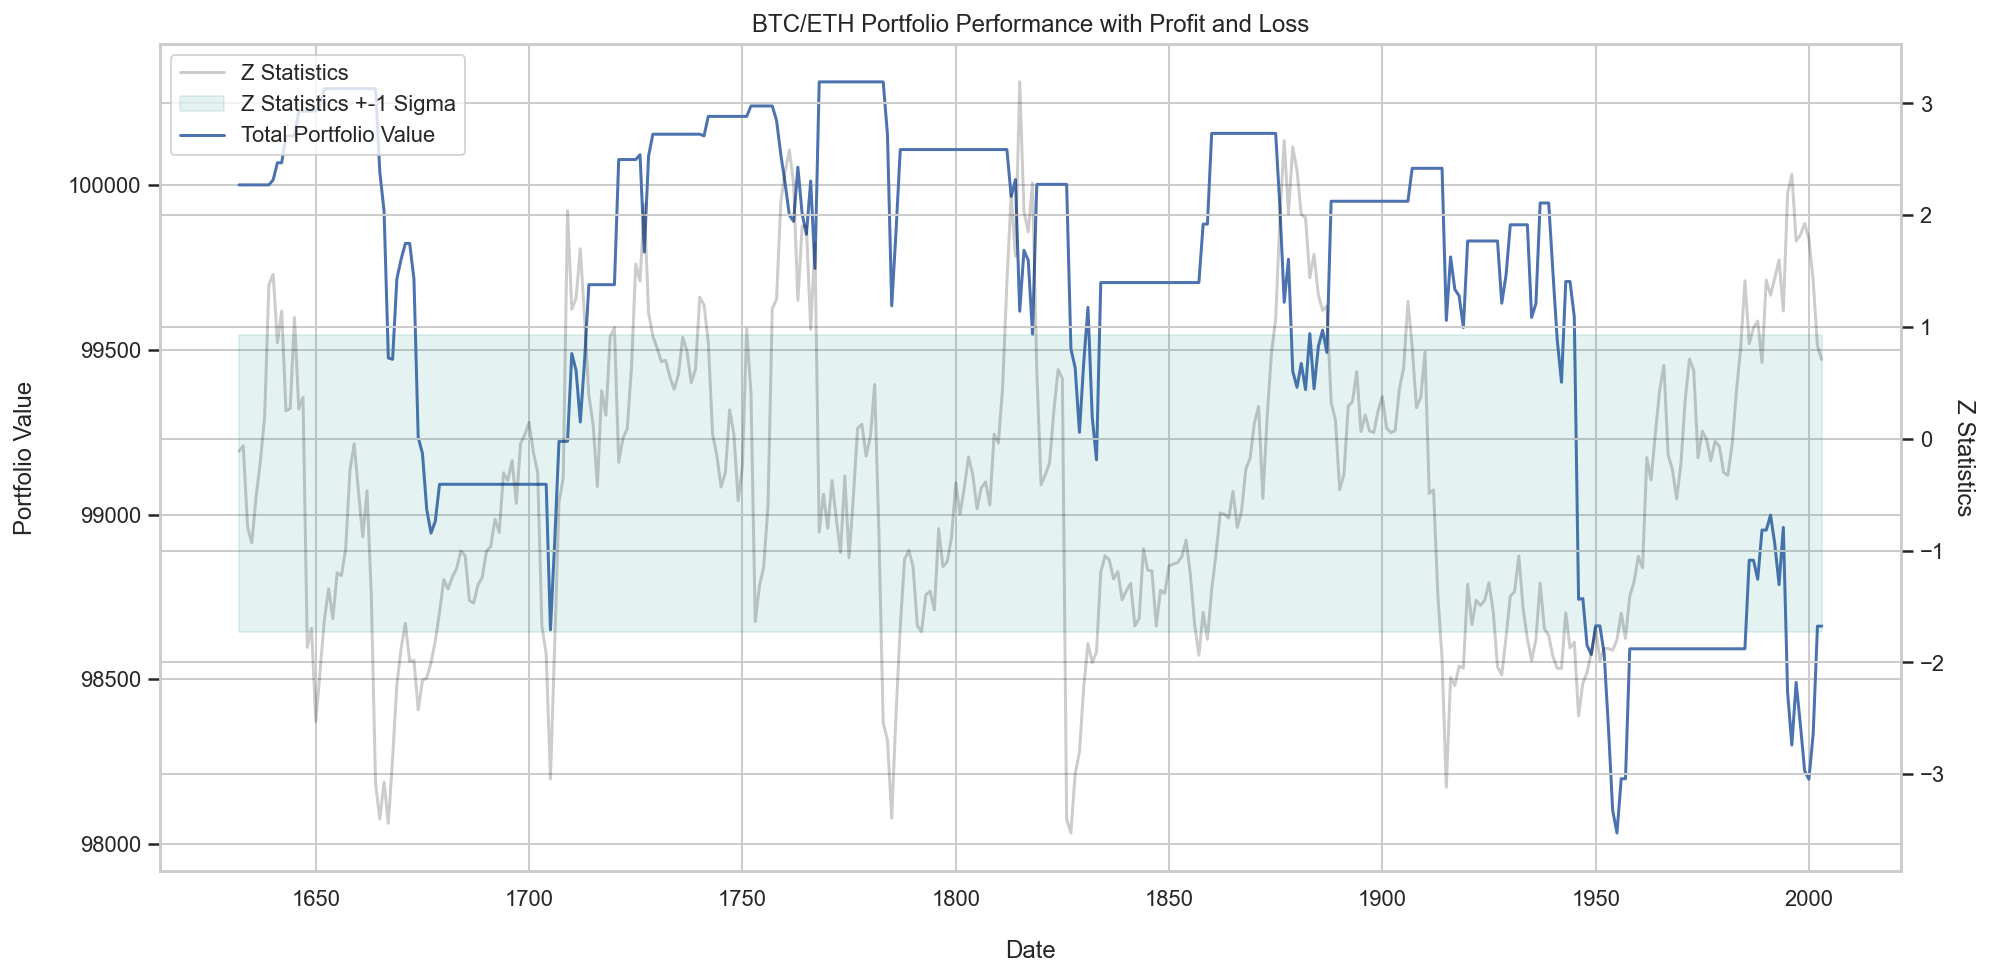

In [48]:
fig = plt.figure(figsize=(15.6,7.6),)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

l1, = ax.plot(portfolio['total asset'], c='b')
l2, = ax2.plot(portfolio['z'], c='black', alpha=0.2)

b = ax2.fill_between(portfolio.index,portfolio['z upper limit'],\
                portfolio['z lower limit'], \
                alpha=0.1,color='teal')

ax.set_ylabel('Portfolio Value')
ax2.set_ylabel('Z Statistics',rotation=270)
ax.yaxis.labelpad=15
ax2.yaxis.labelpad=15
ax.set_xlabel('Date')
ax.xaxis.labelpad=15
plt.title('BTC/ETH Portfolio Performance with Profit and Loss')
plt.legend([l2,b,l1],['Z Statistics',
                      'Z Statistics +-1 Sigma',
                      'Total Portfolio Value'],loc='upper left');
plt.show('images/chart8');

### calculate CAGR

In [49]:
final_portfolio = portfolio['total asset'].iloc[-1]
delta = (portfolio.index[-1] - portfolio.index[0])
print('Number of days = ', delta)

Number of days =  371


In [50]:
YEAR_DAYS = 365
returns = (final_portfolio/initial_capital) ** (YEAR_DAYS/delta) - 1
print('CAGR = {:.3f}%' .format(returns * 100))

CAGR = 95.166%


# Perform a Cointegration test for the Selected Pair ETH & LTC

###  Pair to test strategy

In [51]:
ETH = 'ETH-USD Adj Close'
LTC = 'LTC-USD Adj Close'

### Create a train dataframe of 2 assets

In [52]:
train = pd.DataFrame()
train['ETH'] = train_data[ETH]
train['LTC'] = train_data[LTC]

### Visualize closing prices

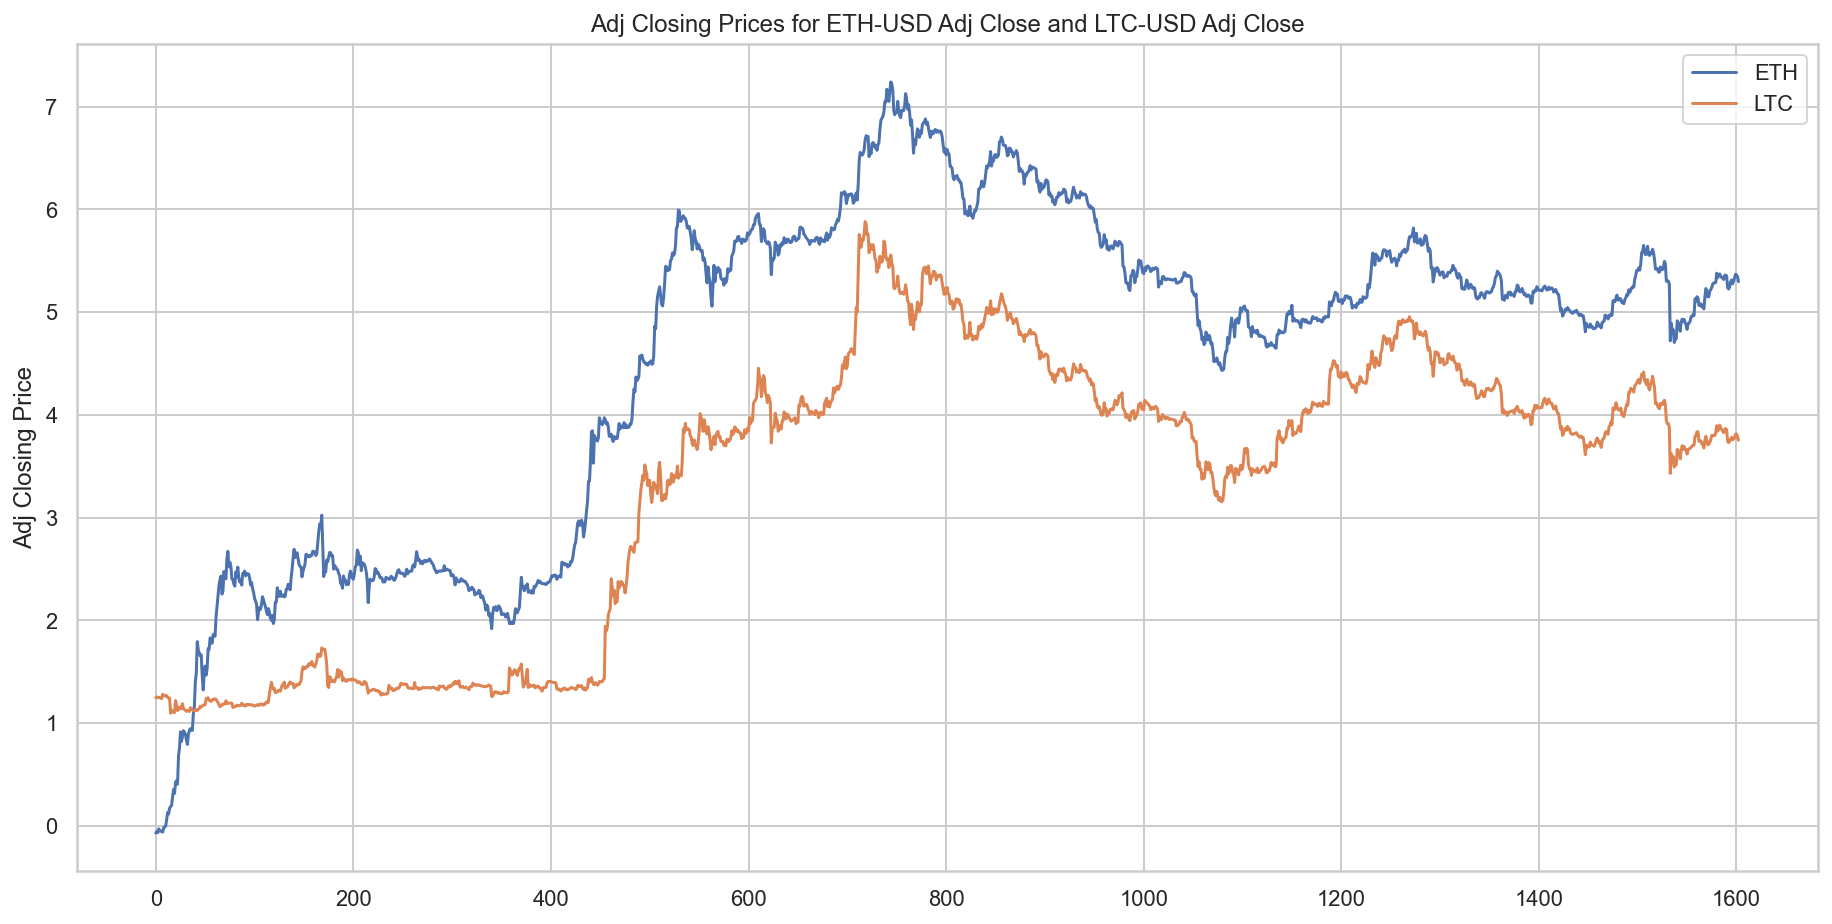

In [53]:
ax = train[['ETH','LTC']].plot(figsize=(15.6, 7.6), title = 'Adj Closing Prices for {} and {}'.format(ETH,LTC))
ax.set_ylabel("Adj Closing Price")
ax.grid(True);
plt.show('images/chart8')

In [54]:
# run OLS regression
model=sm.OLS(train.LTC, train.ETH).fit()

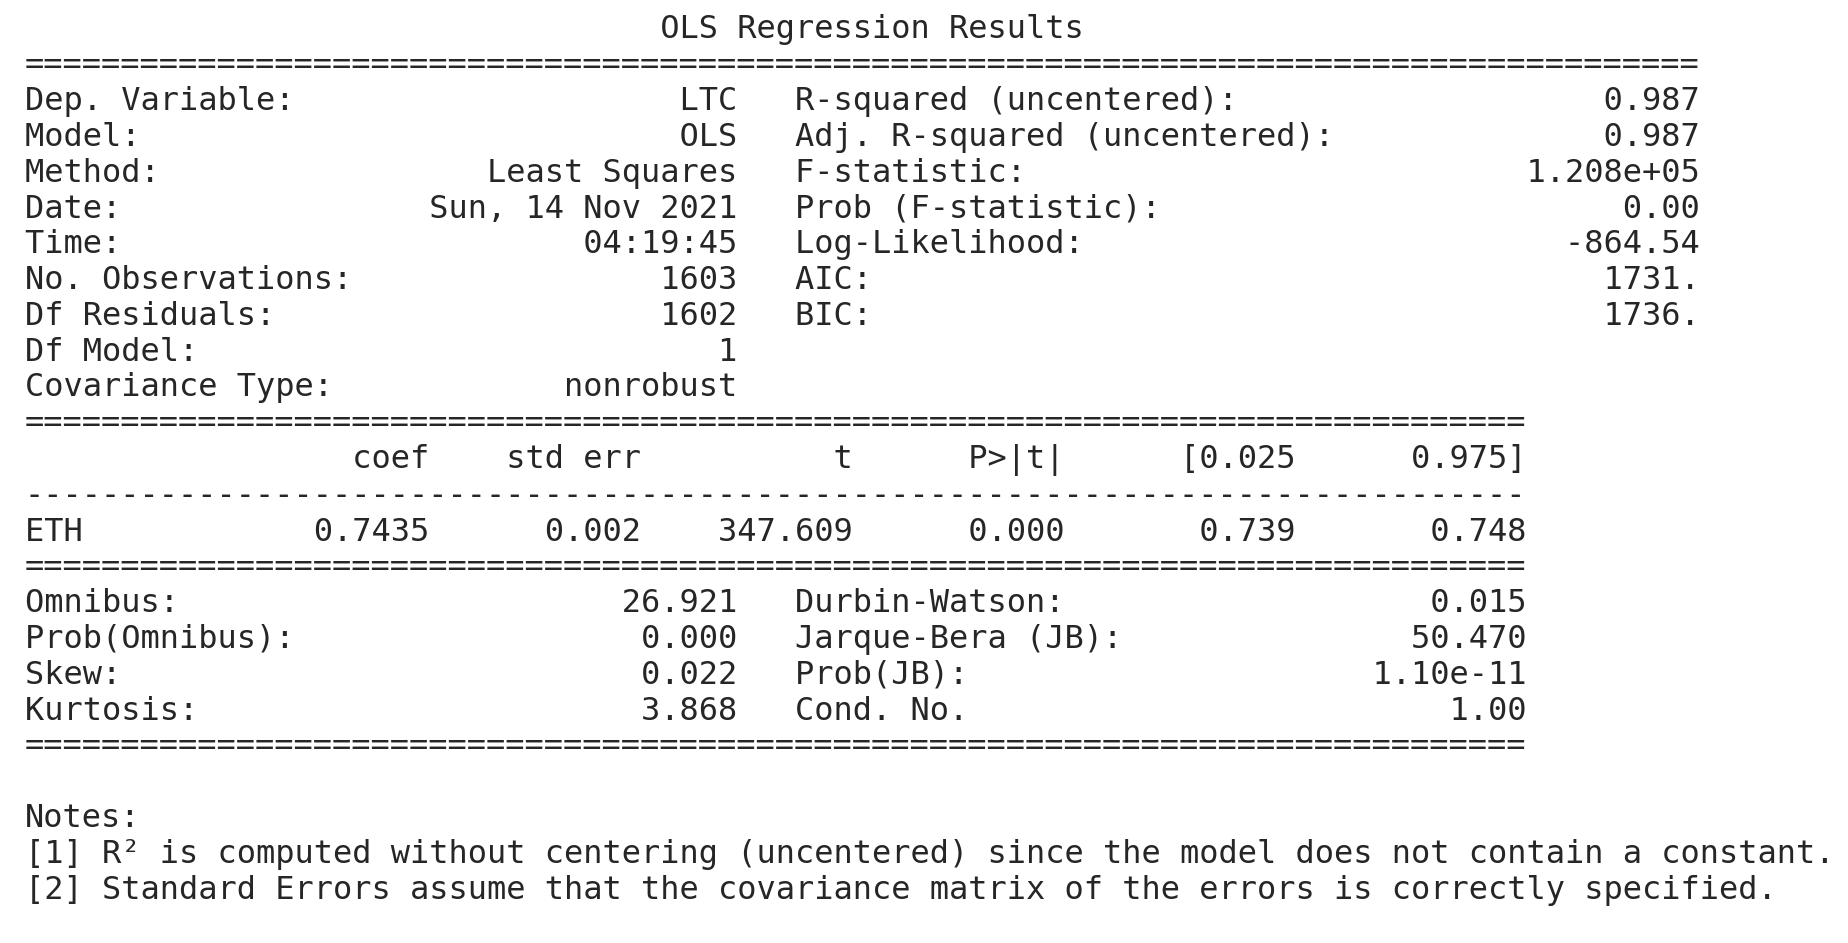

In [55]:
# print regression summary results
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)
plt.show('images/chart9');

In [56]:
print('Hedge Ratio = ', model.params[0])

Hedge Ratio =  0.7435089037177778


In [57]:
# calculate spread
spread = train.LTC - model.params[0] * train.ETH

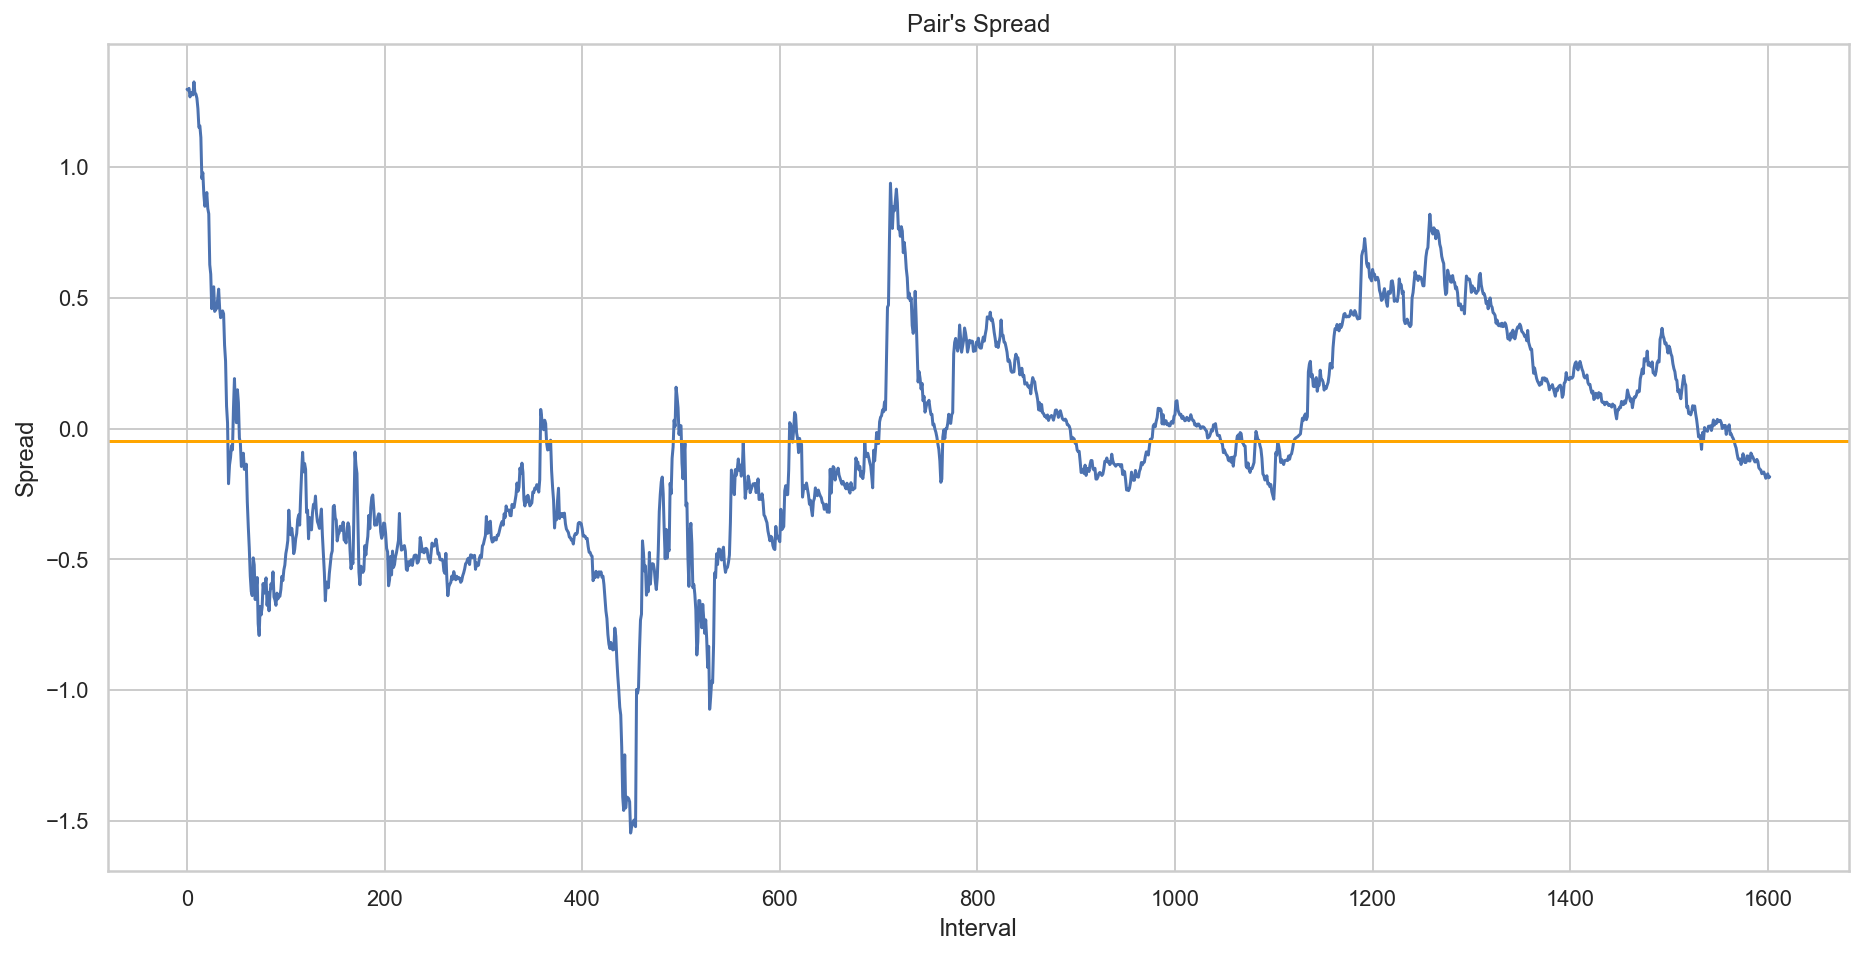

In [58]:
# Plot the spread
ax = spread.plot(figsize=(15.6, 7.6), title = "Pair's Spread")
plt.axhline(spread.mean(),color='orange')
ax.set_ylabel("Spread")
ax.set_xlabel("Interval")
ax.grid(True);
plt.show('images/chart5');

In [59]:
# conduct Augmented Dickey-Fuller test
adf = adfuller(spread, maxlag = 1)
print('Critical Value = ', adf[0])

Critical Value =  -3.6287625678368673


In [60]:
# probablity critical values
print(adf[4])

{'1%': -3.4344410778805936, '5%': -2.86334697077965, '10%': -2.567731995333179}


In [61]:
# conduct Augmented Dickey-Fuller test
adf = adfuller(spread,maxlag=1)
adf

(-3.6287625678368673,
 0.005234367706935103,
 1,
 1601,
 {'1%': -3.4344410778805936,
  '5%': -2.86334697077965,
  '10%': -2.567731995333179},
 -5003.60181311015)

## Generate Trading Signals using z-score

In [62]:
# calculate z-score
def zscore(series):
    return (series - series.rolling(window = 30).mean()) / series.rolling(window=30).std()

In [63]:
# create a dataframe for trading signals
signals = pd.DataFrame()
signals['ETH'] = test_data[ETH] 
signals['LTC'] = test_data[LTC]
ratios = signals.ETH / signals.LTC

In [64]:
# calculate z-score and define upper and lower thresholds
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])

In [65]:
# create signal - short if z-score is greater than upper limit else long
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > \
                                 signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)

In [66]:
# we take the first order difference to obtain portfolio position in that stock
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

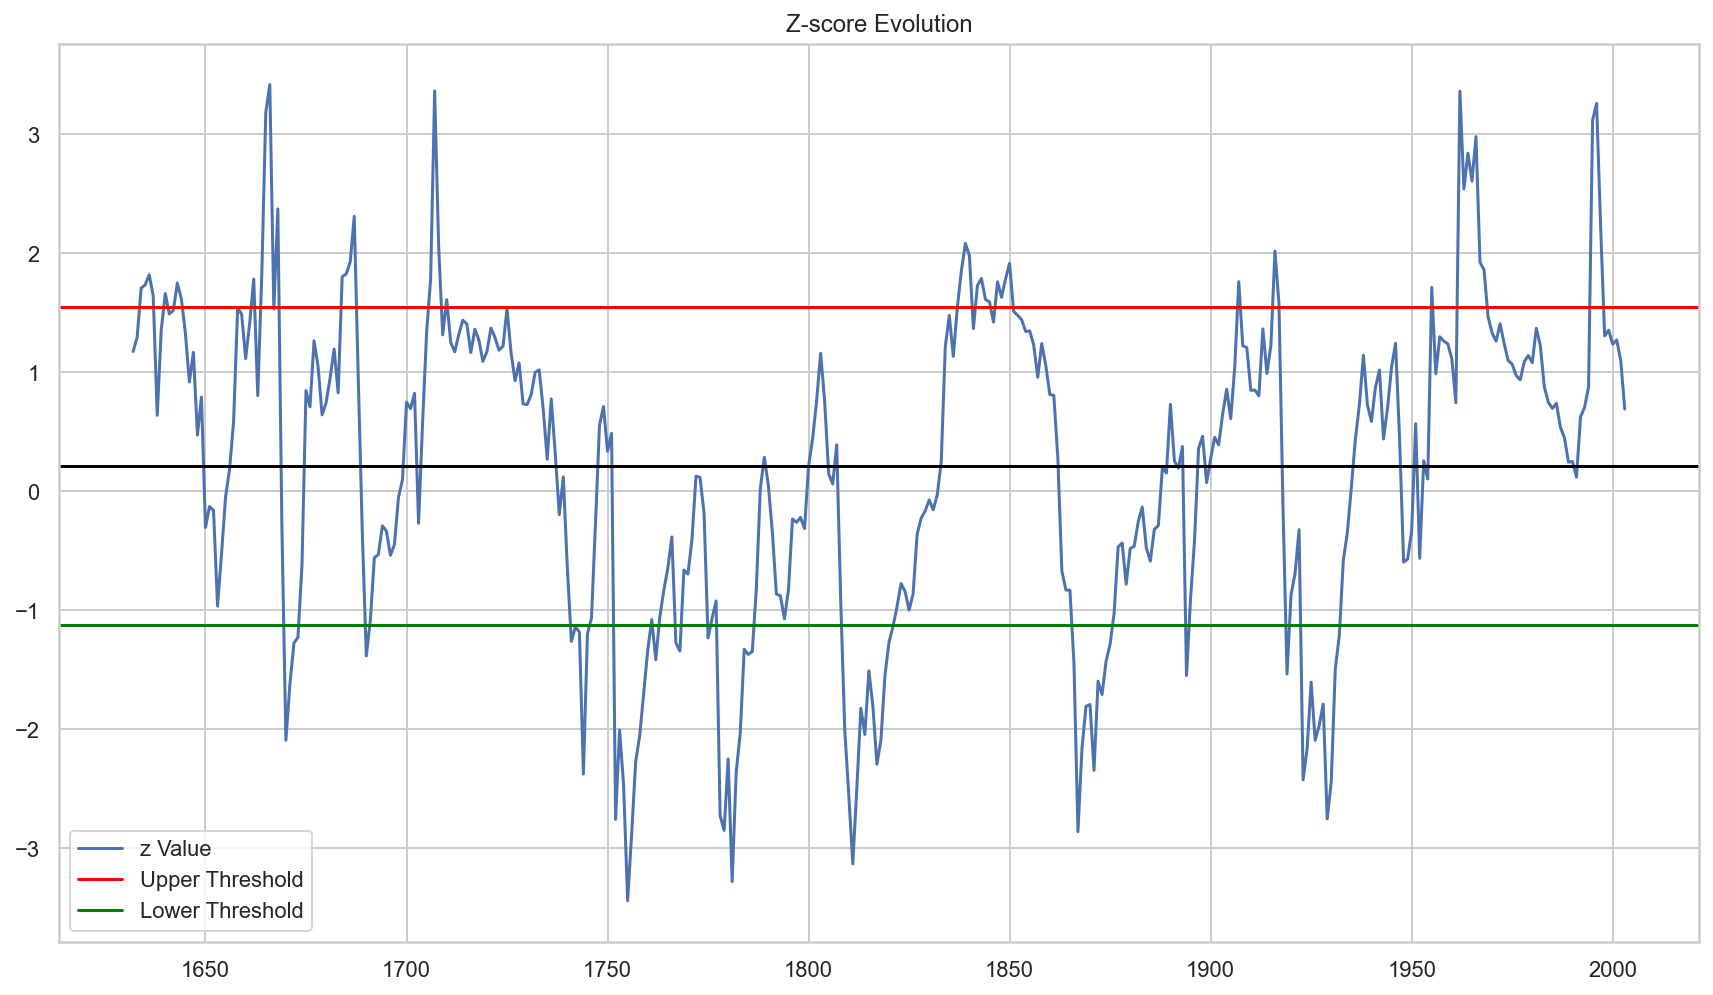

In [67]:
# # visualize z-score and upper and lower thresholds 
signals['z'].plot(label="z Value")
plt.title("Z-score Evolution")
plt.axhline(signals['z'].mean(),color="black")
plt.axhline(signals['z upper limit'].mean(), color="red", label="Upper Threshold")
plt.axhline(signals['z lower limit'].mean(), color="green", label="Lower Threshold")
plt.legend()
plt.tight_layout()
plt.show('images/chart6');

In [68]:
# verify dataframe head and tail
signals.head(10).append(signals.tail(10))

ETH       LTC         z  z upper limit  z lower limit  signals1  \
1603  5.333536  3.788896       NaN       1.547638       -1.12197         0   
1604  5.340871  3.784942       NaN       1.547638       -1.12197         0   
1605  5.310099  3.748301       NaN       1.547638       -1.12197         0   
1606  5.324569  3.759947       NaN       1.547638       -1.12197         0   
1607  5.307784  3.747904       NaN       1.547638       -1.12197         0   
1608  5.341681  3.781035       NaN       1.547638       -1.12197         0   
1609  5.392902  3.801286       NaN       1.547638       -1.12197         0   
1610  5.396692  3.798910       NaN       1.547638       -1.12197         0   
1611  5.490365  3.861543       NaN       1.547638       -1.12197         0   
1612  5.442313  3.819730       NaN       1.547638       -1.12197         0   
1994  7.717068  5.044022  0.877270       1.547638       -1.12197         0   
1995  7.543510  4.826604  3.117782       1.547638       -1.12197        -1   
1996  7.536337  4.784175  3.260445       1.547638       -1.12197        -1   
1997  7.595757  4.857290  2.226763       1.547638       -1.12197        -1   
1998  7.595114  4.901450  1.306637       1.547638       -1.12197         0   
1999  7.502858  4.833801  1.354042       1.547638       -1.12197         0   
2000  7.511655  4.841485  1.235924       1.547638       -1.12197         0   
2001  7.590294  4.885434  1.271838       1.547638       -1.12197         0   
2002  7.639958  4.922684  1.100206       1.547638       -1.12197         0   
2003  7.678219  4.967748  0.691904       1.547638       -1.12197         0   

      positions1  signals2  positions2  
1603         NaN         0         NaN  
1604         0.0         0         0.0  
1605         0.0         0         0.0  
1606         0.0         0         0.0  
1607         0.0         0         0.0  
1608         0.0         0         0.0  
1609         0.0         0         0.0  
1610         0.0         0         0.0  
1611         0.0         0         0.0  
1612         0.0         0         0.0  
1994         0.0         0         0.0  
1995        -1.0         1         1.0  
1996         0.0         1         0.0  
1997         0.0         1         0.0  
1998         1.0         0        -1.0  
1999         0.0         0         0.0  
2000         0.0         0         0.0  
2001         0.0         0         0.0  
2002         0.0         0         0.0  
2003         0.0         0         0.0

In [69]:
# # check portfolio position
signals[signals.signals1 != 0].head(5)

ETH       LTC         z  z upper limit  z lower limit  signals1  \
1634  5.491139  3.788453  1.707618       1.547638       -1.12197        -1   
1635  5.497751  3.788256  1.734671       1.547638       -1.12197        -1   
1636  5.462867  3.757562  1.820709       1.547638       -1.12197        -1   
1637  5.450800  3.750998  1.643238       1.547638       -1.12197        -1   
1640  5.417642  3.723481  1.662285       1.547638       -1.12197        -1   

      positions1  signals2  positions2  
1634        -1.0         1         1.0  
1635         0.0         1         0.0  
1636         0.0         1         0.0  
1637         0.0         1         0.0  
1640        -1.0         1         1.0

In [70]:
signals[signals.positions1 != 0].head().append(signals[signals.positions1 != 0].tail())

ETH       LTC         z  z upper limit  z lower limit  signals1  \
1603  5.333536  3.788896       NaN       1.547638       -1.12197         0   
1634  5.491139  3.788453  1.707618       1.547638       -1.12197        -1   
1638  5.436635  3.768633  0.638552       1.547638       -1.12197         0   
1640  5.417642  3.723481  1.662285       1.547638       -1.12197        -1   
1641  5.430200  3.734116  1.490494       1.547638       -1.12197         0   
1956  8.220174  5.758616  0.987748       1.547638       -1.12197         0   
1962  7.808193  5.244495  3.362283       1.547638       -1.12197        -1   
1969  7.968561  5.294431  1.467320       1.547638       -1.12197         0   
1995  7.543510  4.826604  3.117782       1.547638       -1.12197        -1   
1998  7.595114  4.901450  1.306637       1.547638       -1.12197         0   

      positions1  signals2  positions2  
1603         NaN         0         NaN  
1634        -1.0         1         1.0  
1638         1.0         0        -1.0  
1640        -1.0         1         1.0  
1641         1.0         0        -1.0  
1956         1.0         0        -1.0  
1962        -1.0         1         1.0  
1969         1.0         0        -1.0  
1995        -1.0         1         1.0  
1998         1.0         0        -1.0

In [71]:
signals.loc[signals['positions1'] == 1].index
signals['ETH'][signals['positions1'] == 1].value_counts()

8.220174    1
7.968561    1
6.465941    1
7.595114    1
5.417819    1
5.717214    1
5.865543    1
6.026029    1
7.440054    1
5.757820    1
5.835161    1
6.131097    1
7.519439    1
5.814907    1
5.501326    1
5.971746    1
7.658406    1
6.162528    1
5.957366    1
7.666663    1
6.071557    1
5.773041    1
5.430200    1
7.653441    1
6.062694    1
7.168658    1
5.436635    1
7.115574    1
7.479922    1
7.136706    1
Name: ETH, dtype: int64

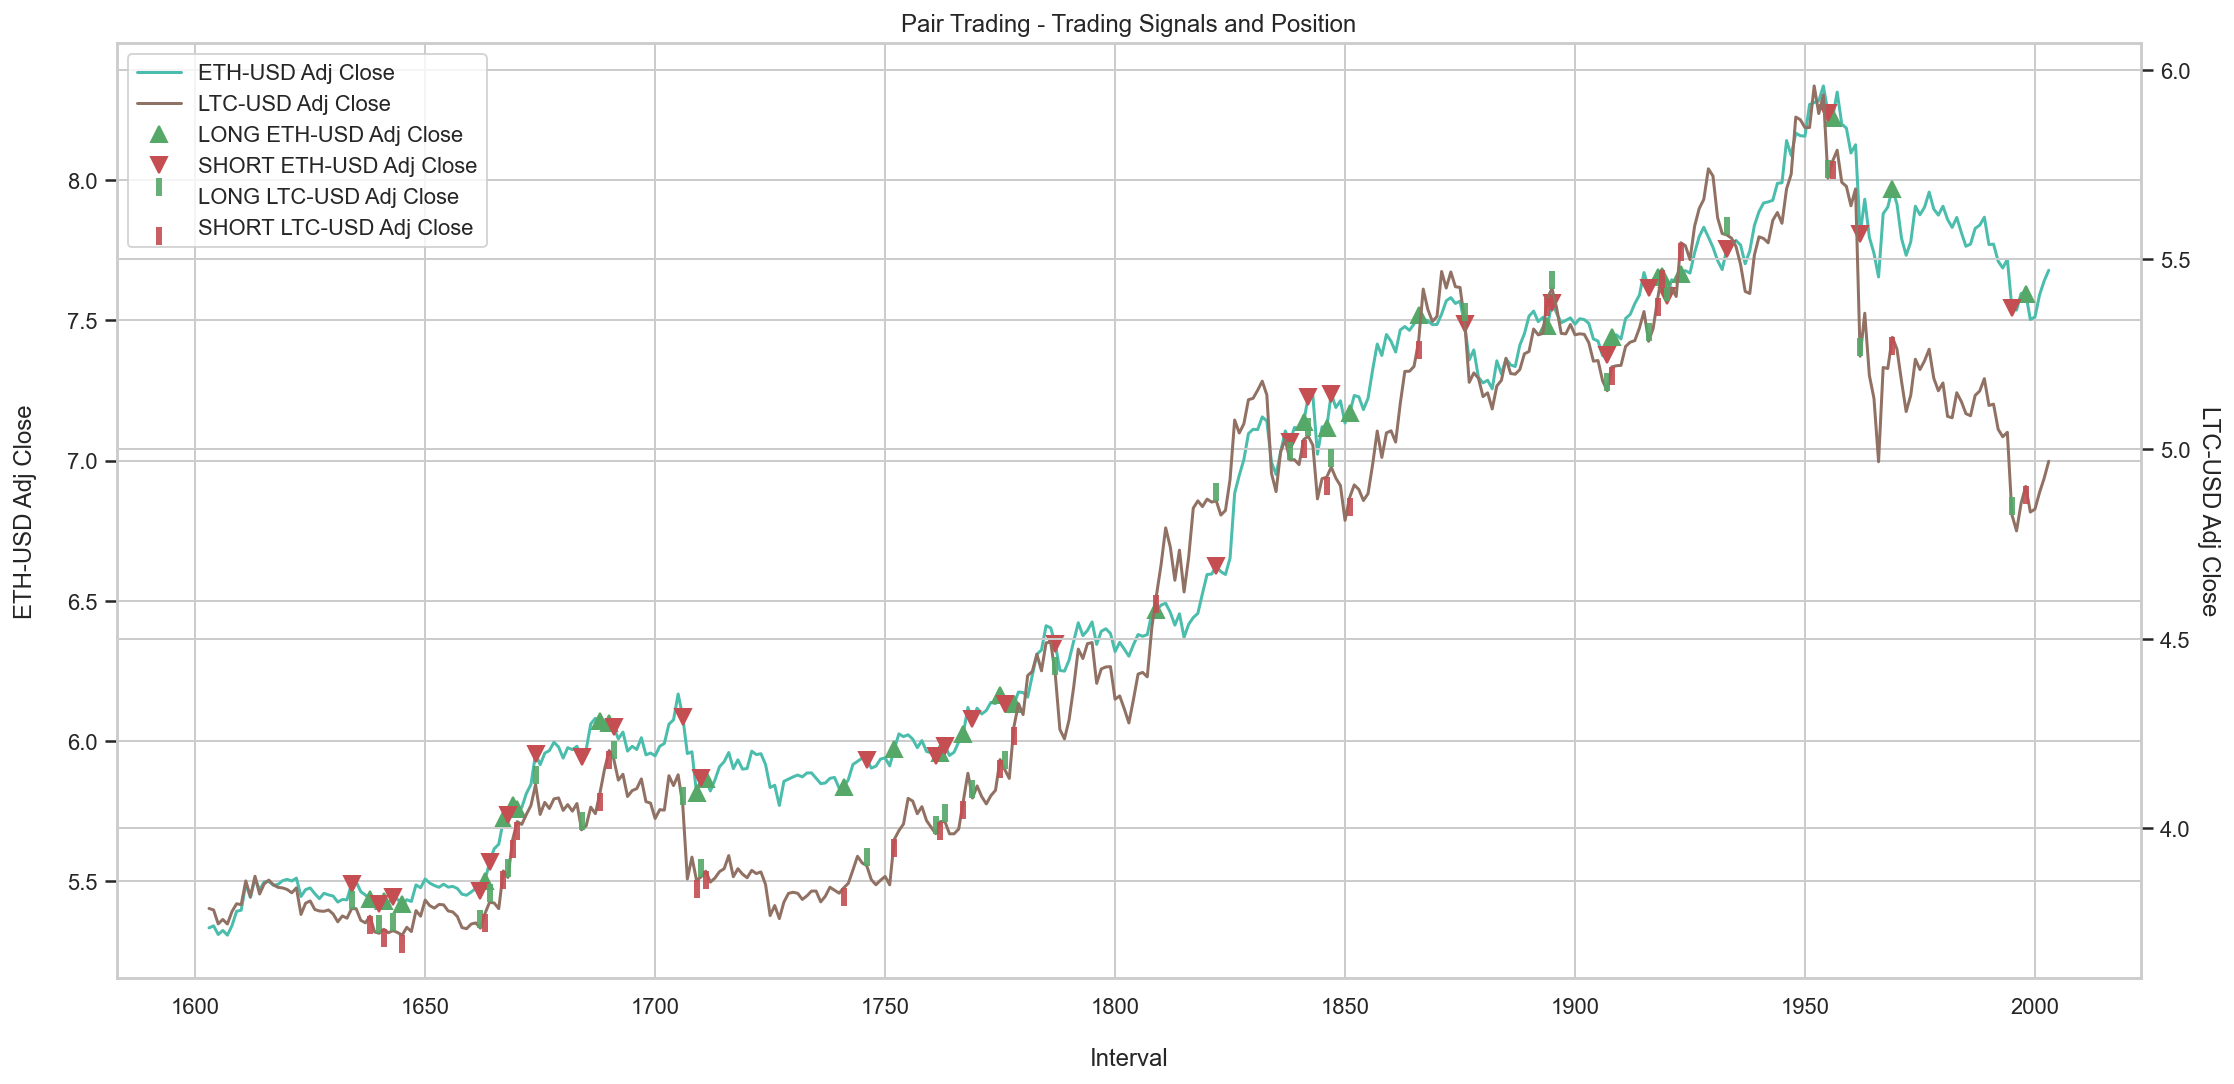

In [72]:
# visualize trading signals and position
fig=plt.figure(figsize=(15.6,7.6))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()

#plot two different assets
l1, = bx.plot(signals['ETH'], c='#4abdac')
l2, = bx2.plot(signals['LTC'], c='#907163')

u1, = bx.plot(signals['ETH'][signals['positions1'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=1)

d1, = bx.plot(signals['ETH'][signals['positions1'] == -1], lw=0,marker='v',markersize=8, c='r',alpha=1)

u2, = bx2.plot(signals['LTC'][signals['positions2'] == 1], lw=0,marker=2,markersize=9, c='g',alpha=0.9, markeredgewidth=3)

d2, = bx2.plot(signals['LTC'][signals['positions2'] == -1], lw=0,marker=3,markersize=9, c='r',alpha=0.9,markeredgewidth=3)

bx.set_ylabel(ETH,)
bx2.set_ylabel(LTC, rotation=270)
bx.yaxis.labelpad=15
bx2.yaxis.labelpad=15
bx.set_xlabel('Interval')
bx.xaxis.labelpad=15

plt.legend([l1,l2,u1,d1,u2,d2], [ETH, LTC,'LONG {}'.format(ETH),
           'SHORT {}'.format(ETH),
           'LONG {}'.format(LTC),
           'SHORT {}'.format(LTC)], loc ='best')

plt.title('Pair Trading - Trading Signals and Position')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show('images/chart7');

## Portfolio Profit and Loss Calculation for Selected pair 2

In [73]:
# initial capital to calculate the actual pnl
initial_capital = 50000

# shares to buy for each position
positions1 = initial_capital// max(signals['LTC'])
positions2 = initial_capital// max(signals['ETH'])

In [74]:
# since there are two assets, we calculate each asset Pnl separately 
# and in the end we aggregate them into one portfolio
portfolio = pd.DataFrame()
portfolio['LTC'] = signals['LTC']
portfolio['LTC holdings'] = signals['positions1'].cumsum() * signals['LTC'] * positions1
portfolio['LTC cash'] = initial_capital - (signals['positions1'] * signals['LTC'] * positions1).cumsum()
portfolio['total LTC'] = portfolio['LTC holdings'] + portfolio['LTC cash']
portfolio['LTC return'] = portfolio['total LTC'].pct_change()
portfolio['positions1'] = signals['positions1']

In [75]:
# pnl for the 2nd asset
portfolio['ETH'] = signals['ETH']
portfolio['holdings2'] = signals['positions2'].cumsum() * signals['ETH'] * positions2
portfolio['cash2'] = initial_capital - (signals['positions2'] * signals['ETH'] * positions2).cumsum()
portfolio['total ETH'] = portfolio['holdings2'] + portfolio['cash2']
portfolio['return2'] = portfolio['total ETH'].pct_change()
portfolio['positions2'] = signals['positions2']

In [76]:
# total pnl and z-score
portfolio['z'] = signals['z']
portfolio['total asset'] = portfolio['total ETH'] + portfolio['total LTC']
portfolio['z upper limit'] = signals['z upper limit']
portfolio['z lower limit'] = signals['z lower limit']
portfolio = portfolio.dropna()

In [77]:
portfolio.round(3)

LTC  LTC holdings   LTC cash  total LTC  LTC return  positions1  \
1632  3.769         0.000  50000.000  50000.000       0.000         0.0   
1633  3.763         0.000  50000.000  50000.000       0.000         0.0   
1634  3.788    -31796.489  81796.489  50000.000       0.000        -1.0   
1635  3.788    -31794.832  81796.489  50001.657       0.000         0.0   
1636  3.758    -31537.214  81796.489  50259.275       0.005         0.0   
...     ...           ...        ...        ...         ...         ...   
1999  4.834         0.000  51802.306  51802.306       0.000         0.0   
2000  4.841         0.000  51802.306  51802.306       0.000         0.0   
2001  4.885         0.000  51802.306  51802.306       0.000         0.0   
2002  4.923         0.000  51802.306  51802.306       0.000         0.0   
2003  4.968         0.000  51802.306  51802.306       0.000         0.0   

        ETH  holdings2      cash2  total ETH  return2  positions2      z  \
1632  5.435      0.000  50000.000  50000.000    0.000         0.0  1.175   
1633  5.434      0.000  50000.000  50000.000    0.000         0.0  1.295   
1634  5.491  32935.849  17064.151  50000.000    0.000         1.0  1.708   
1635  5.498  32975.508  17064.151  50039.659    0.001         0.0  1.735   
1636  5.463  32766.277  17064.151  49830.428   -0.004         0.0  1.821   
...     ...        ...        ...        ...      ...         ...    ...   
1999  7.503      0.000  46763.721  46763.721    0.000         0.0  1.354   
2000  7.512      0.000  46763.721  46763.721    0.000         0.0  1.236   
2001  7.590      0.000  46763.721  46763.721    0.000         0.0  1.272   
2002  7.640      0.000  46763.721  46763.721    0.000         0.0  1.100   
2003  7.678      0.000  46763.721  46763.721    0.000         0.0  0.692   

      total asset  z upper limit  z lower limit  
1632   100000.000          1.548         -1.122  
1633   100000.000          1.548         -1.122  
1634   100000.000          1.548         -1.122  
1635   100041.317          1.548         -1.122  
1636   100089.703          1.548         -1.122  
...           ...            ...            ...  
1999    98566.027          1.548         -1.122  
2000    98566.027          1.548         -1.122  
2001    98566.027          1.548         -1.122  
2002    98566.027          1.548         -1.122  
2003    98566.027          1.548         -1.122  

[372 rows x 16 columns]

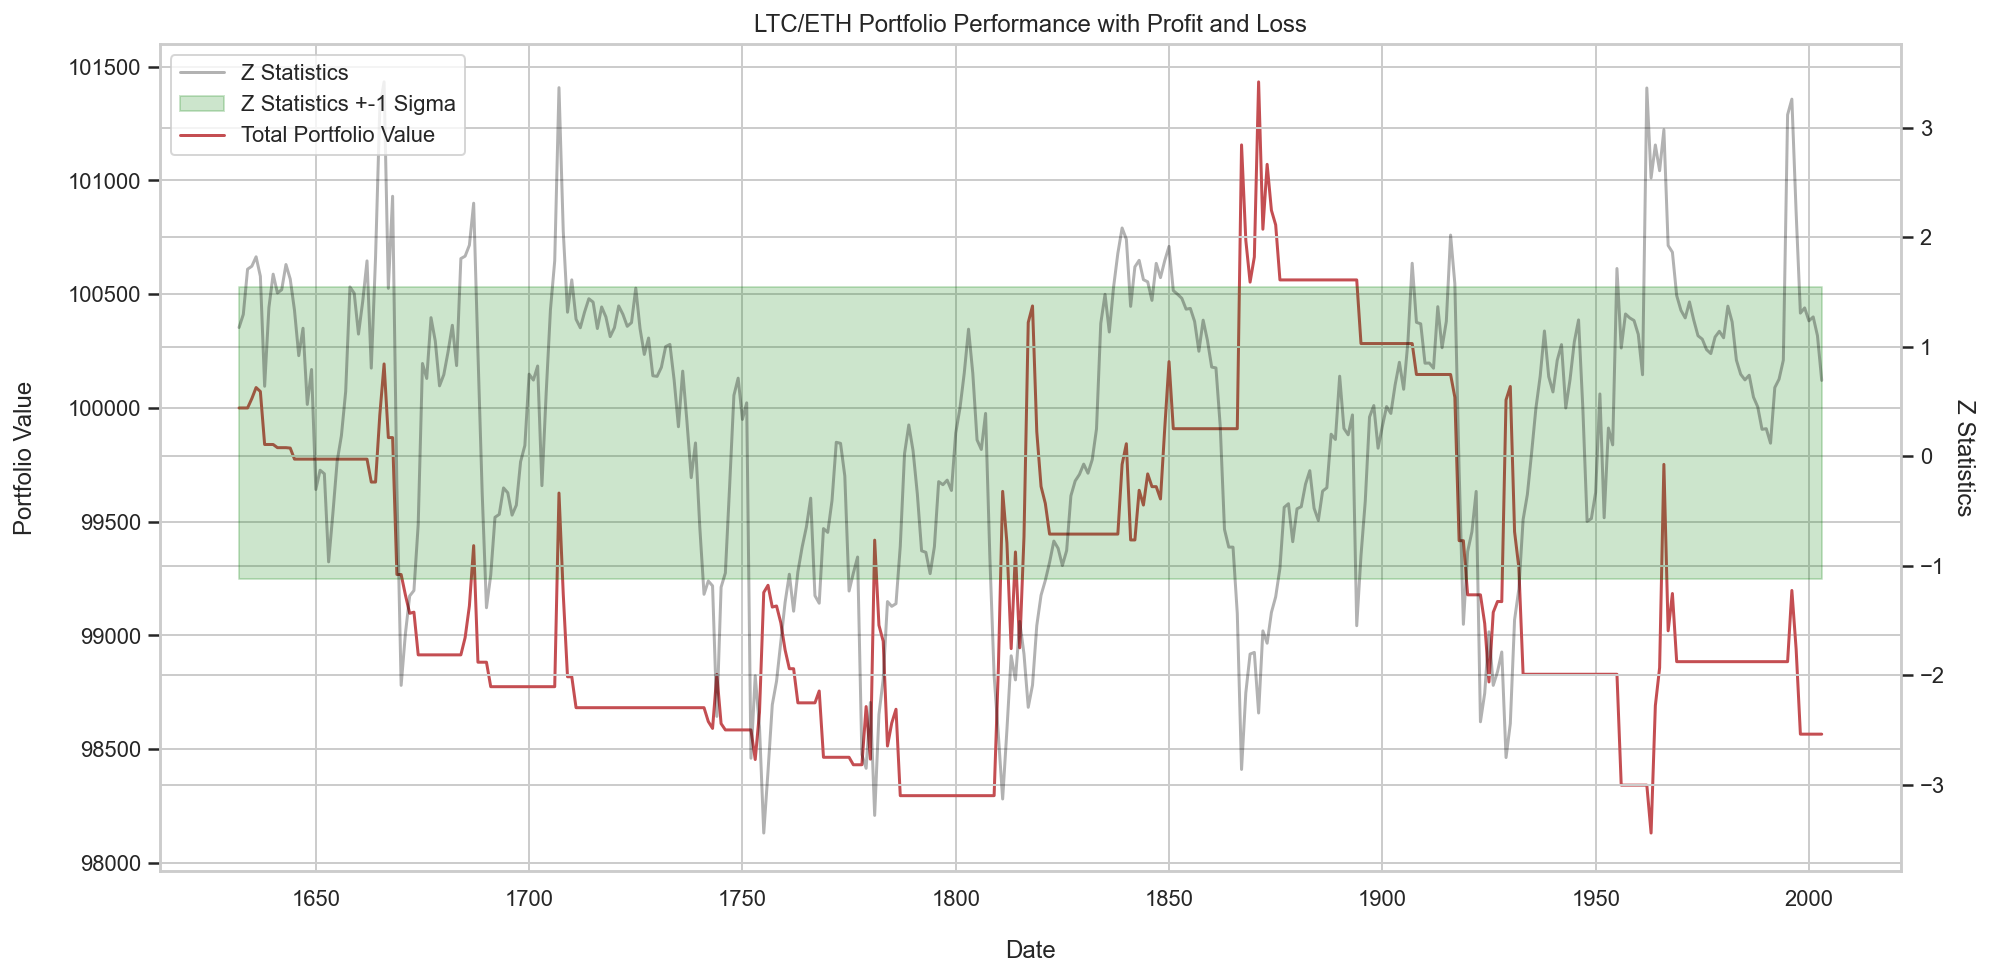

In [78]:
# plot the asset value change of the portfolio and pnl along with z-score
fig = plt.figure(figsize=(15.6,7.6),)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

l1, = ax.plot(portfolio['total asset'], c='r')
l2, = ax2.plot(portfolio['z'], c='black', alpha=0.3)

b = ax2.fill_between(portfolio.index,portfolio['z upper limit'],\
                portfolio['z lower limit'], \
                alpha=0.2,color='green')

ax.set_ylabel('Portfolio Value')
ax2.set_ylabel('Z Statistics',rotation=270)
ax.yaxis.labelpad=15
ax2.yaxis.labelpad=15
ax.set_xlabel('Date')
ax.xaxis.labelpad=15
plt.title('LTC/ETH Portfolio Performance with Profit and Loss')
plt.legend([l2,b,l1],['Z Statistics',
                      'Z Statistics +-1 Sigma',
                      'Total Portfolio Value'],loc='upper left');
plt.show('images/chart8');

## calculate CAGR

In [79]:
final_portfolio = portfolio['total asset'].iloc[-1]
delta = (portfolio.index[-1] - portfolio.index[0])
print('Number of days = ', delta)

Number of days =  371


In [80]:
YEAR_DAYS = 365
returns = (final_portfolio/initial_capital) ** (YEAR_DAYS/delta) - 1
print('CAGR = {:.3f}%' .format(returns * 100))

CAGR = 94.980%


# Perform a Cointegration test for the Selected Pair 3

In [81]:
# final pair to test strategy
DOGE = 'DOGE-USD Adj Close'
BTC = 'BTC-USD Adj Close'

In [82]:
# create a train dataframe of 2 assets
train = pd.DataFrame()
train['BTC'] = train_data[BTC]
train['DOGE'] = train_data[DOGE]

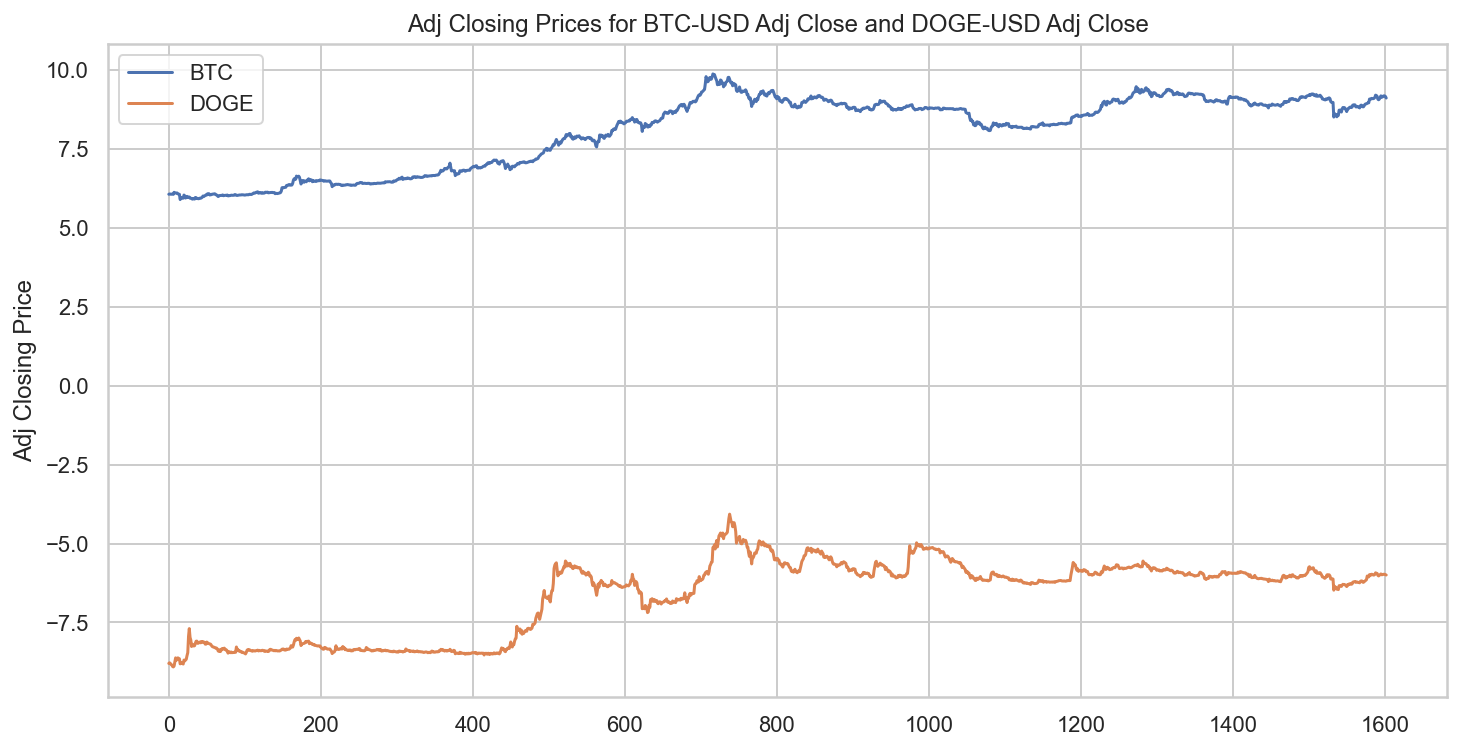

In [83]:
# visualize closing prices
ax = train[['BTC','DOGE']].plot(figsize=(12, 6), title = 'Adj Closing Prices for {} and {}'.format(BTC,DOGE))
ax.set_ylabel("Adj Closing Price")
ax.grid(True);
plt.show('images/chart8')

In [84]:
# run OLS regression
model=sm.OLS(train.DOGE, train.BTC).fit()

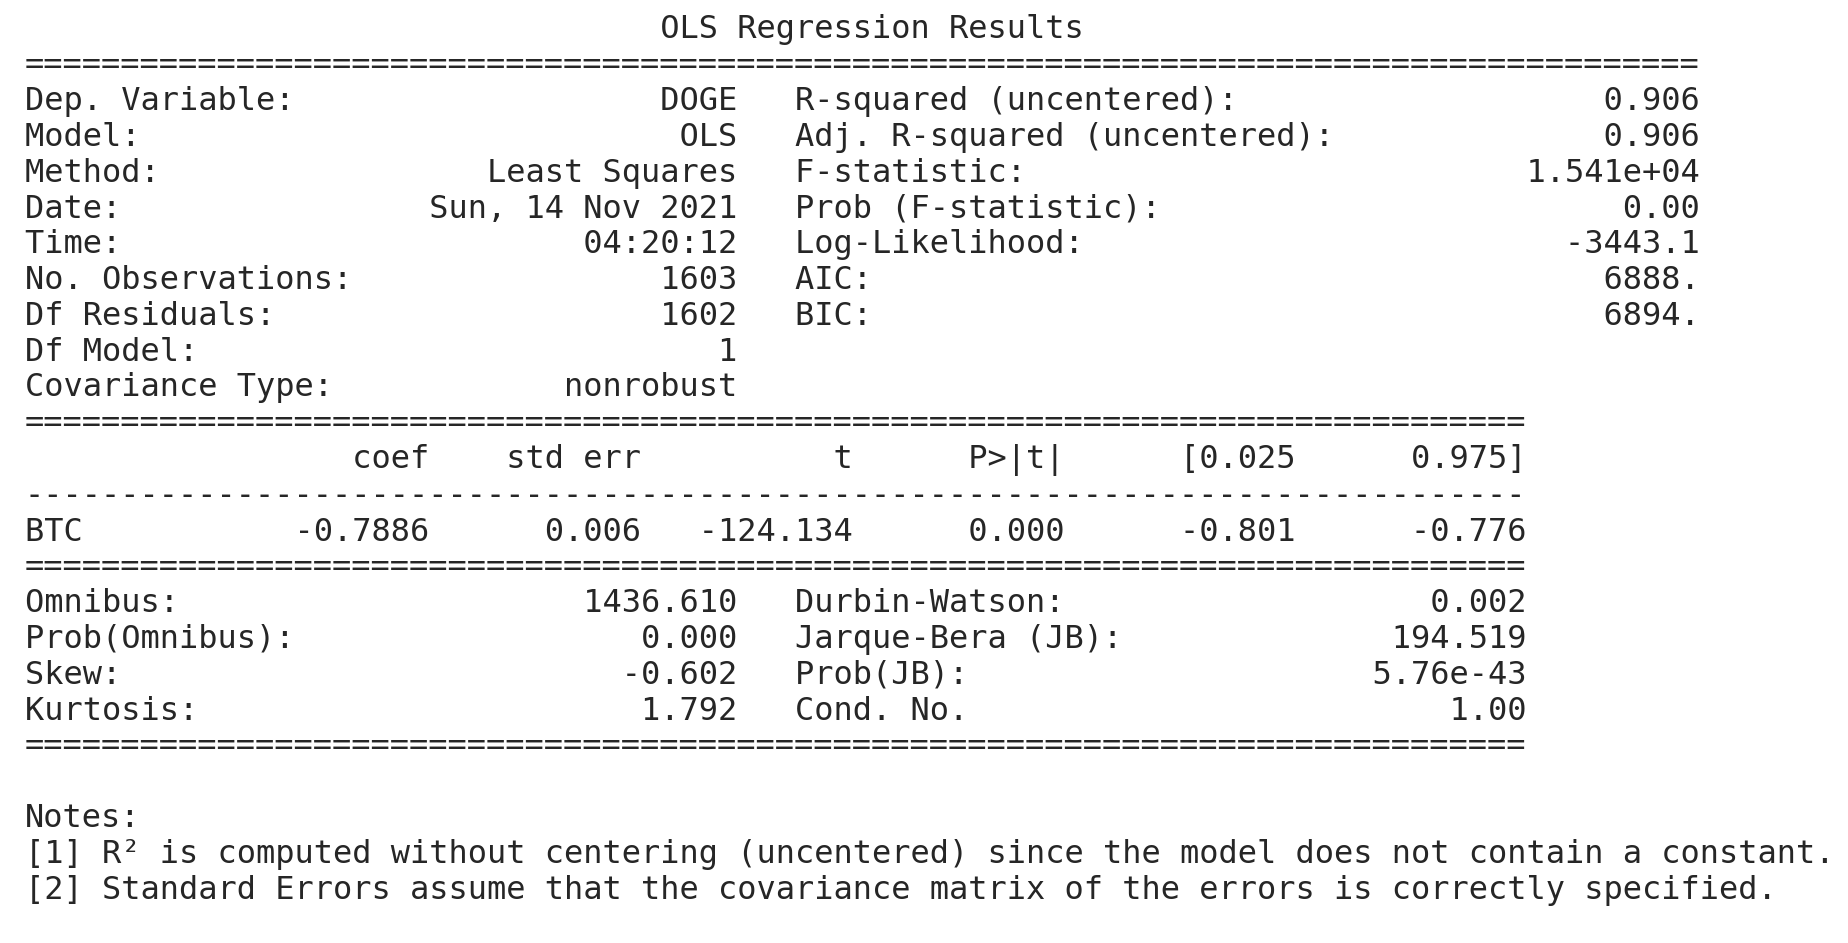

In [85]:
# print regression summary results
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)
plt.show('images/chart9');

In [86]:
print('Hedge Ratio = ', model.params[0])

Hedge Ratio =  -0.7885531161335977


In [87]:
# calculate spread
spread = train.BTC - model.params[0] * train.DOGE

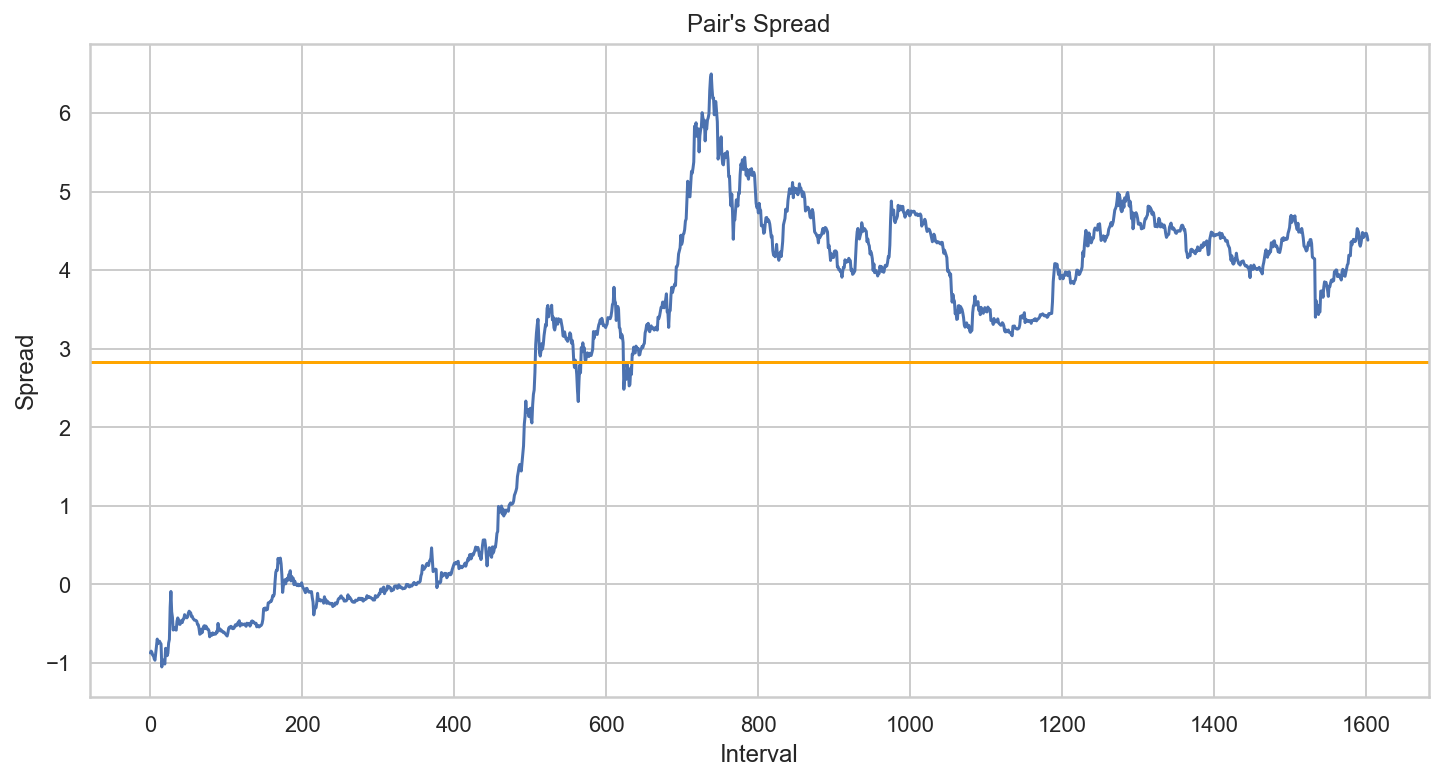

In [88]:
# Plot the spread
ax = spread.plot(figsize=(12, 6), title = "Pair's Spread")
plt.axhline(spread.mean(),color='orange')
ax.set_ylabel("Spread")
ax.set_xlabel("Interval")
ax.grid(True);
plt.show('images/chart5');

In [89]:
# conduct Augmented Dickey-Fuller test
adf = adfuller(spread, maxlag = 1)
print('Critical Value = ', adf[0])

Critical Value =  -1.6457656216071257


In [90]:
# probablity critical values
print(adf[4])

{'1%': -3.4344385200395746, '5%': -2.8633458417902085, '10%': -2.567731394153064}


In [91]:
# conduct Augmented Dickey-Fuller test
adf = adfuller(spread,maxlag=1)
adf

(-1.6457656216071257,
 0.4592497033714109,
 0,
 1602,
 {'1%': -3.4344385200395746,
  '5%': -2.8633458417902085,
  '10%': -2.567731394153064},
 -3566.953596154688)

# Generate Trading Signals using z-score

In [92]:
# calculate z-score
def zscore(series):
    return (series - series.rolling(window = 30).mean()) / series.rolling(window=30).std()

In [93]:
# create a dataframe for trading signals
signals = pd.DataFrame()
signals['BTC'] = test_data[BTC] 
signals['DOGE'] = test_data[DOGE]
ratios = signals.BTC / signals.DOGE

In [94]:
# calculate z-score and define upper and lower thresholds
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])

In [95]:
# create signal - short if z-score is greater than upper limit else long
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > \
                                 signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)

In [96]:
# we take the first order difference to obtain portfolio position in that stock
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

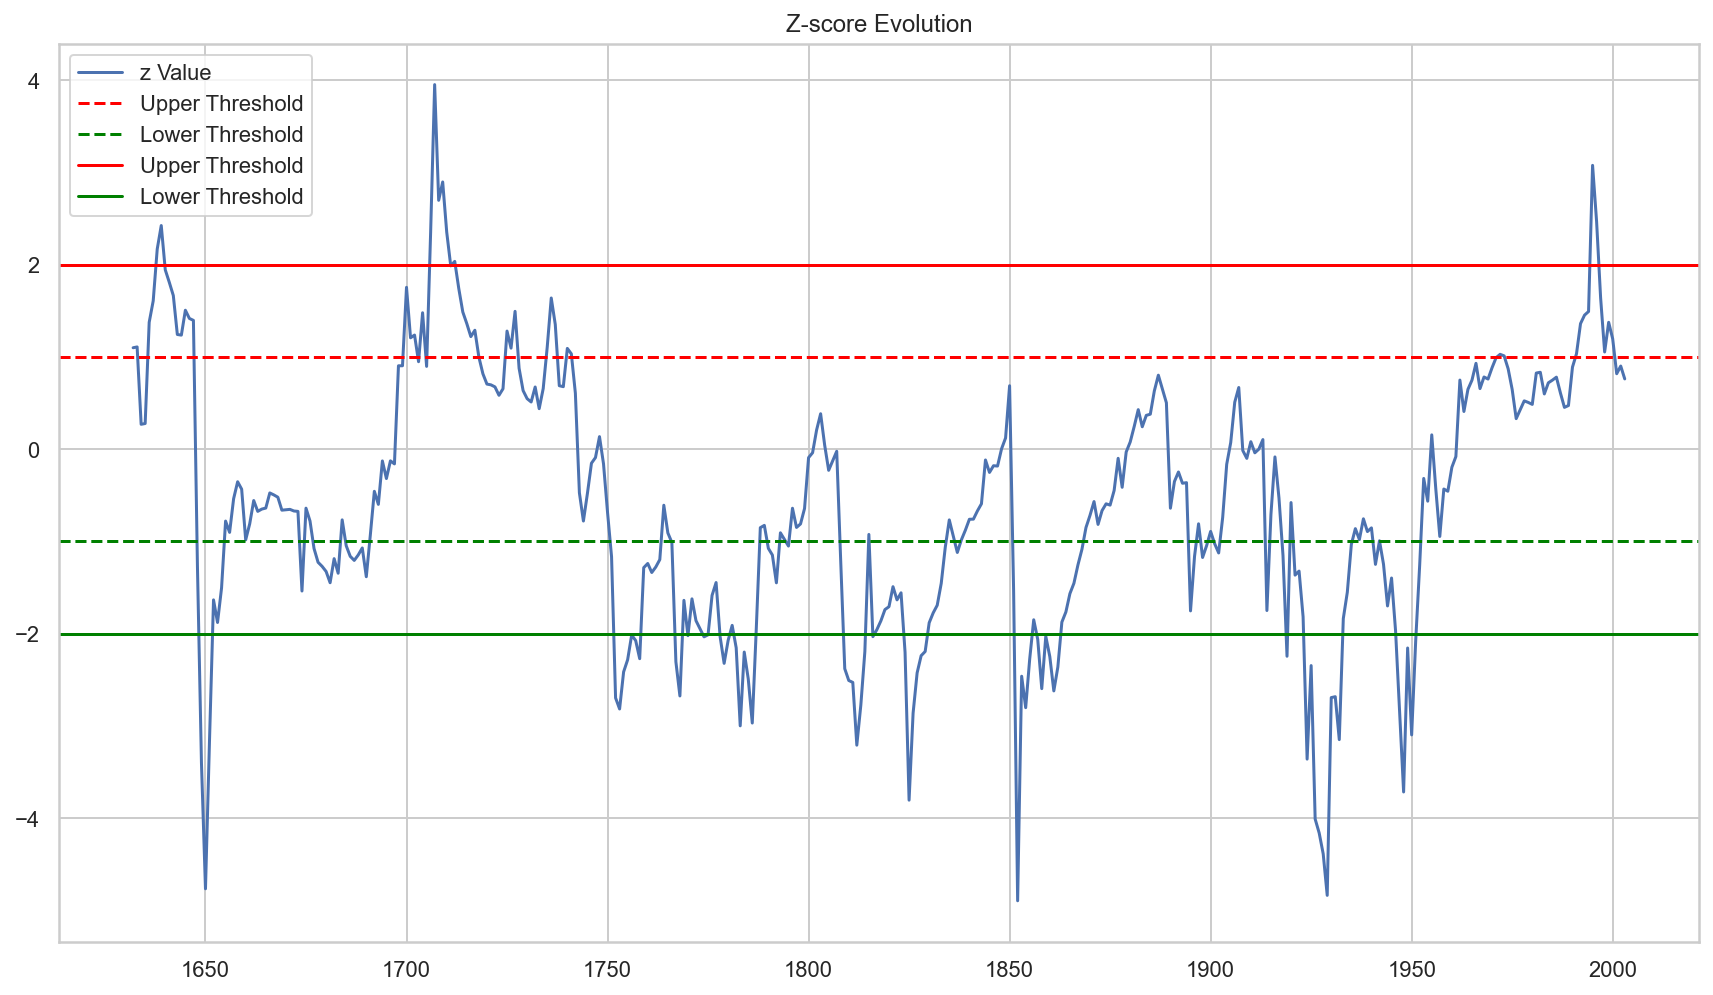

In [97]:
# # visualize z-score and upper and lower thresholds 
signals['z'].plot(label="z Value")
plt.title("Z-score Evolution")
plt.axhline((1), color="red",linestyle = '--', label="Upper Threshold")
plt.axhline((-1), color="green",linestyle ='--' , label="Lower Threshold")
plt.axhline((2), color="red", label="Upper Threshold")
plt.axhline((-2), color="green",label="Lower Threshold")
plt.legend()
plt.tight_layout()
plt.show('images/chart6');

# Individual Cointegration 

In [100]:
BTC = df[['BTC-USD Adj Close']]
BTClog = np.log(BTC)
BTClog

BTC-USD Adj Close
0              6.065103
1              6.073814
2              6.071749
3              6.063811
4              6.070948
...                 ...
1999          10.362107
2000          10.379295
2001          10.453043
2002          10.446809
2003          10.487595

[2004 rows x 1 columns]

Text(0.5, 1.0, 'BTC-USD Adj Close')

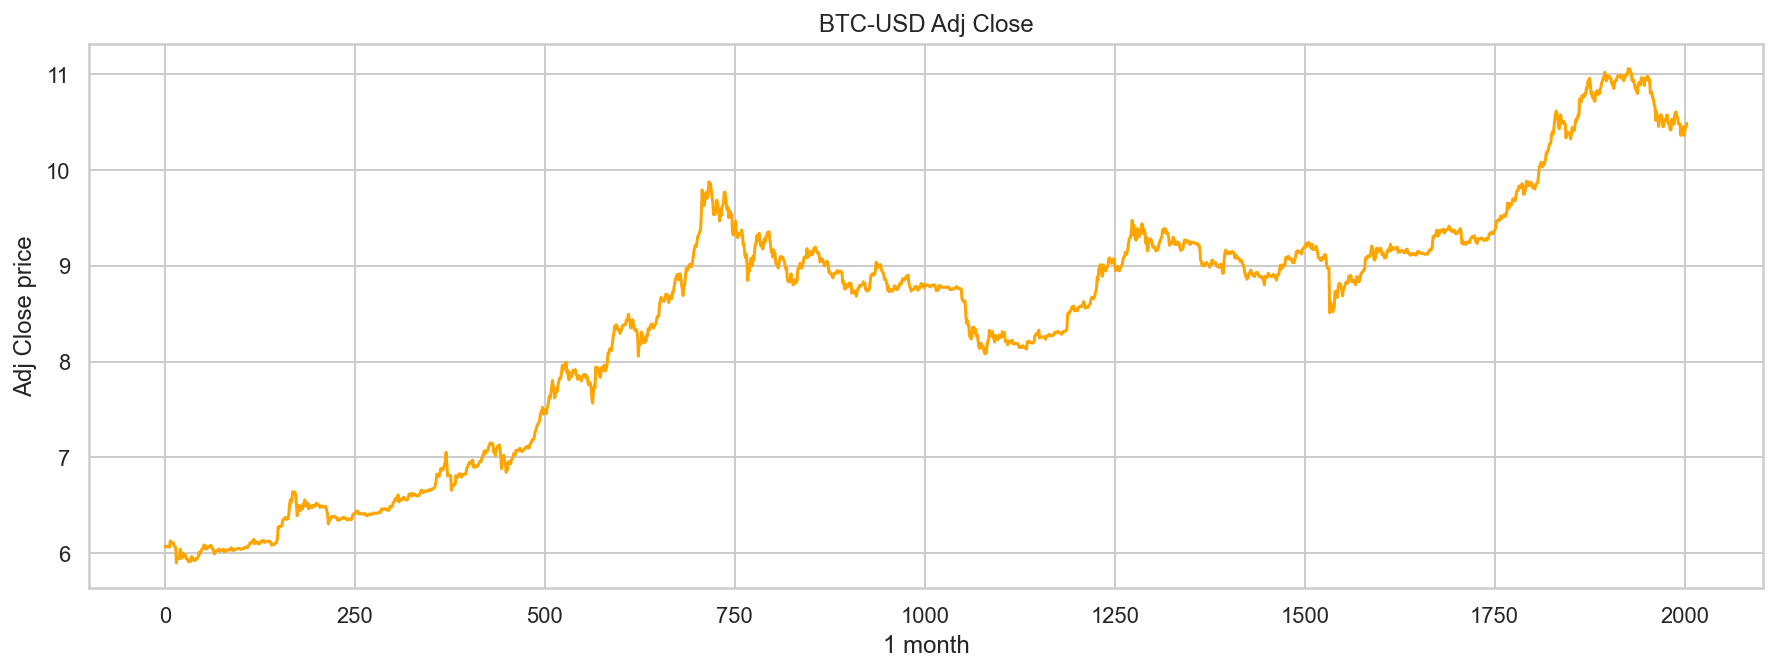

In [101]:
BTClog['BTC-USD Adj Close'].plot(figsize=(15,5),color='orange')
plt.xlabel("1 month")
plt.ylabel("Adj Close price")
plt.title("BTC-USD Adj Close")

## Augmented Dickey- Fuller Test - BTC-USD Adj Close 

In [102]:
X = BTClog["BTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Unit Root")
else:
    print("Failed to Reject Ho - No Unit Root")
    

ADF Statistic: -1.021752
p-value: 0.745248
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - No Unit Root


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [103]:
def kpss_test(BTC):
    statistic , p_value , n_lags, critical_values = kpss(BTClog['BTC-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
        
kpss_test(BTC)

 KPSS Statistics:0.8318321374634637
 p-value: 0.01
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Result: The series is not stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## Difference time series BTC-USD

In [104]:
BTC_stationary = BTClog.diff().dropna()
BTC_stationary

BTC-USD Adj Close
1              0.008711
2             -0.002065
3             -0.007938
4              0.007137
5             -0.002615
...                 ...
1999          -0.091305
2000           0.017188
2001           0.073747
2002          -0.006233
2003           0.040785

[2003 rows x 1 columns]

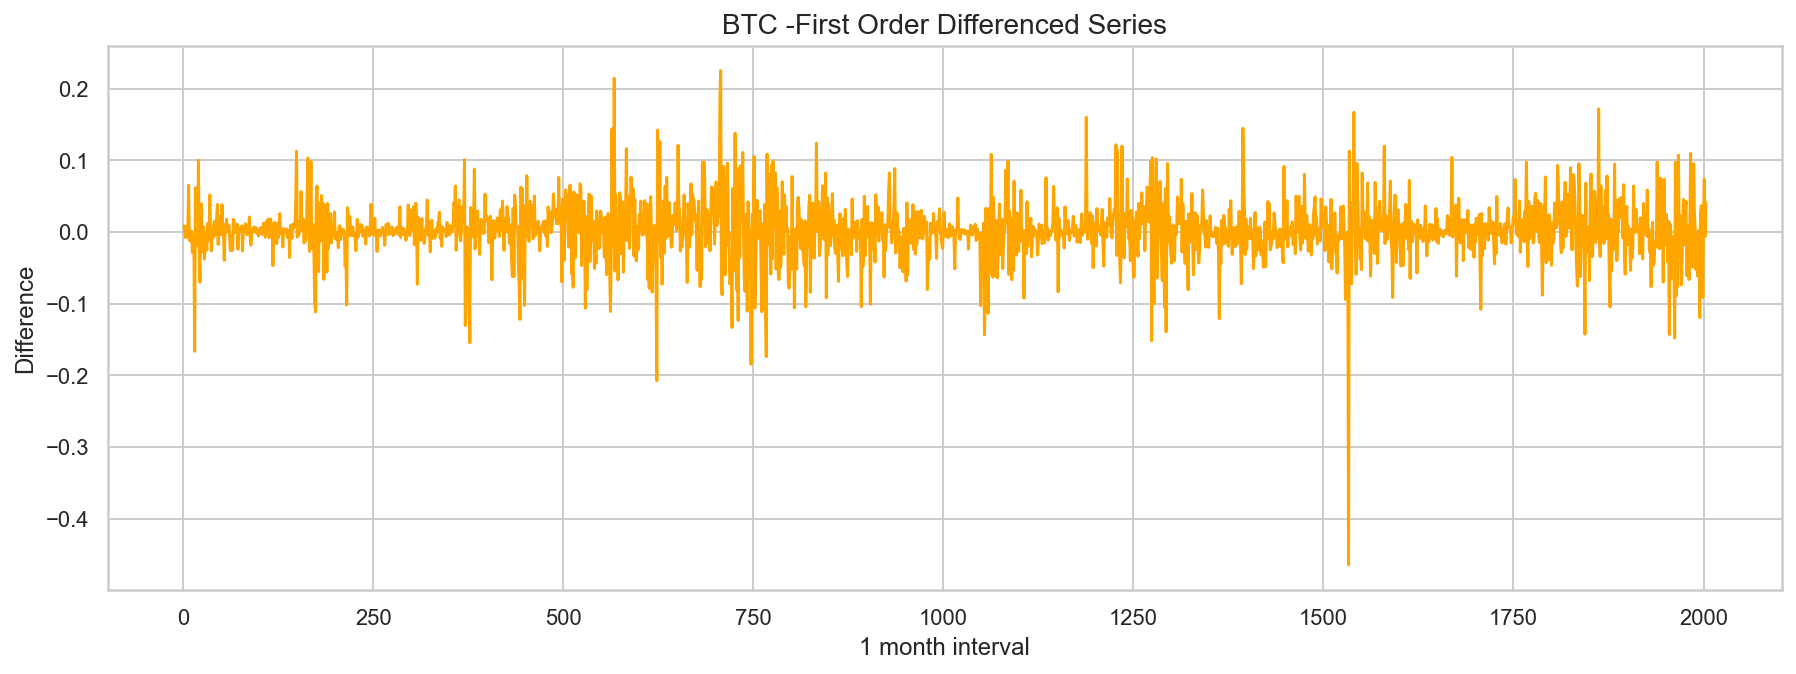

In [105]:
plt.figure(figsize=(15, 5))
plt.plot(BTC_stationary, color = 'orange')
plt.title('BTC -First Order Differenced Series', fontsize=14)
plt.xlabel('1 month interval', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

## Augmented Dickey-Fuller Test after difference

In [106]:
X = BTC_stationary["BTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -31.039257
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho - Time series in stationary


  ## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) after difference time series

In [107]:
def kpss_test(BTC):
    statistic , p_value , n_lags, critical_values = kpss(BTC_stationary['BTC-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series is stationary")
        
kpss_test(BTC_stationary)

 KPSS Statistics:0.08616347023032662
 p-value: 0.1
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Reject Ho - Time series is stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# LTC-USD

In [108]:
LTC = df[['LTC-USD Adj Close']]
LTClog = np.log(LTC)
LTClog

LTC-USD Adj Close
0              1.247081
1              1.255325
2              1.253380
3              1.247914
4              1.251445
...                 ...
1999           4.833801
2000           4.841485
2001           4.885434
2002           4.922684
2003           4.967748

[2004 rows x 1 columns]

Text(0.5, 1.0, 'LTC-USD Adj Close')

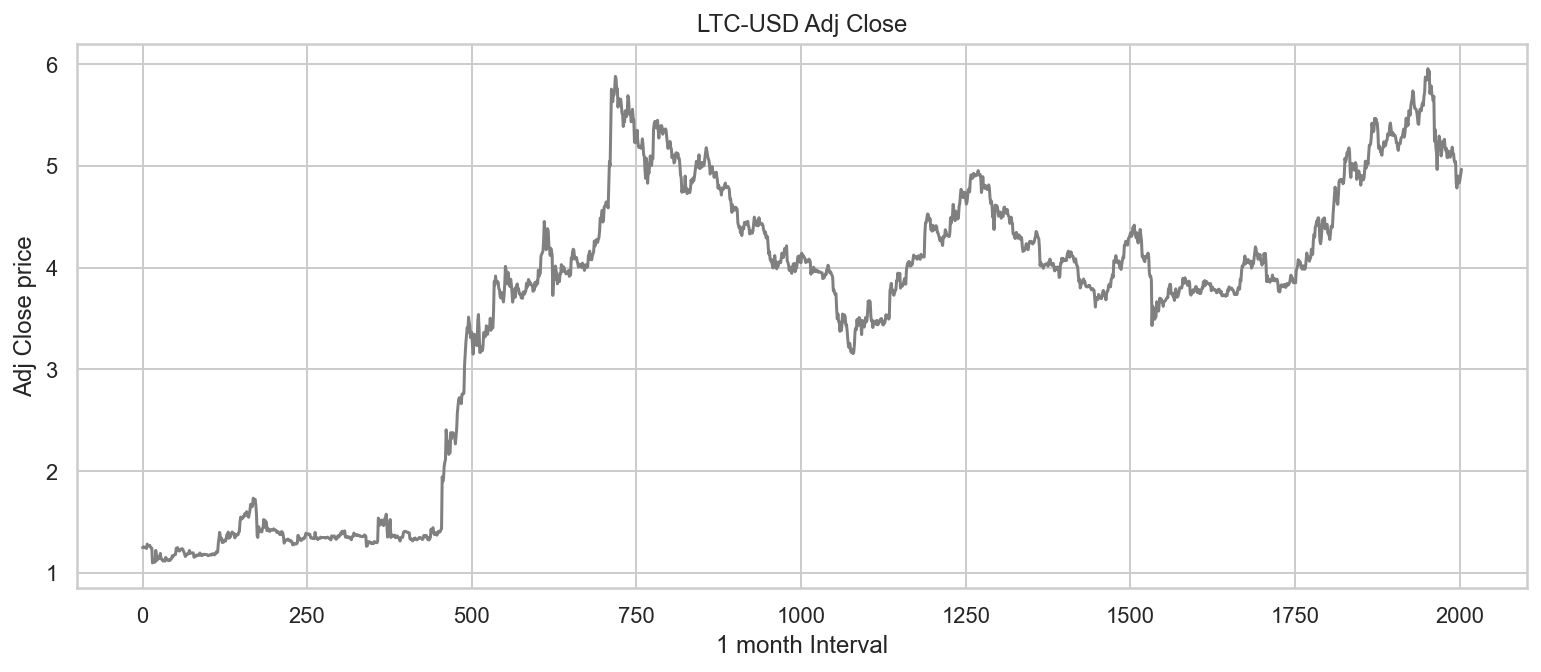

In [109]:
LTClog['LTC-USD Adj Close'].plot(figsize=(13,5),color = 'grey')
plt.xlabel("1 month Interval")
plt.ylabel("Adj Close price")
plt.title("LTC-USD Adj Close")

## Augmented Dickey-Fuller Test LTC_USD Adj Close

In [110]:
#Augmented Dickey-Filler Test - 
X = LTClog["LTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series is stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -1.489641
p-value: 0.538630
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [111]:
def kpss_test(LTC):
    statistic , p_value , n_lags, critical_values = kpss(LTClog['LTC-USD Adj Close'],'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series is stationary")
        
kpss_test(LTC)

 KPSS Statistics:1.0665853748300962
 p-value: 0.01
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Failed to Reject Ho - Time Series is Non-Stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## Difference time series LTC-USD

In [112]:
LTC_stationary = LTClog.diff().dropna()
LTC_stationary

LTC-USD Adj Close
1              0.008244
2             -0.001945
3             -0.005466
4              0.003531
5             -0.007385
...                 ...
1999          -0.067649
2000           0.007684
2001           0.043949
2002           0.037250
2003           0.045064

[2003 rows x 1 columns]

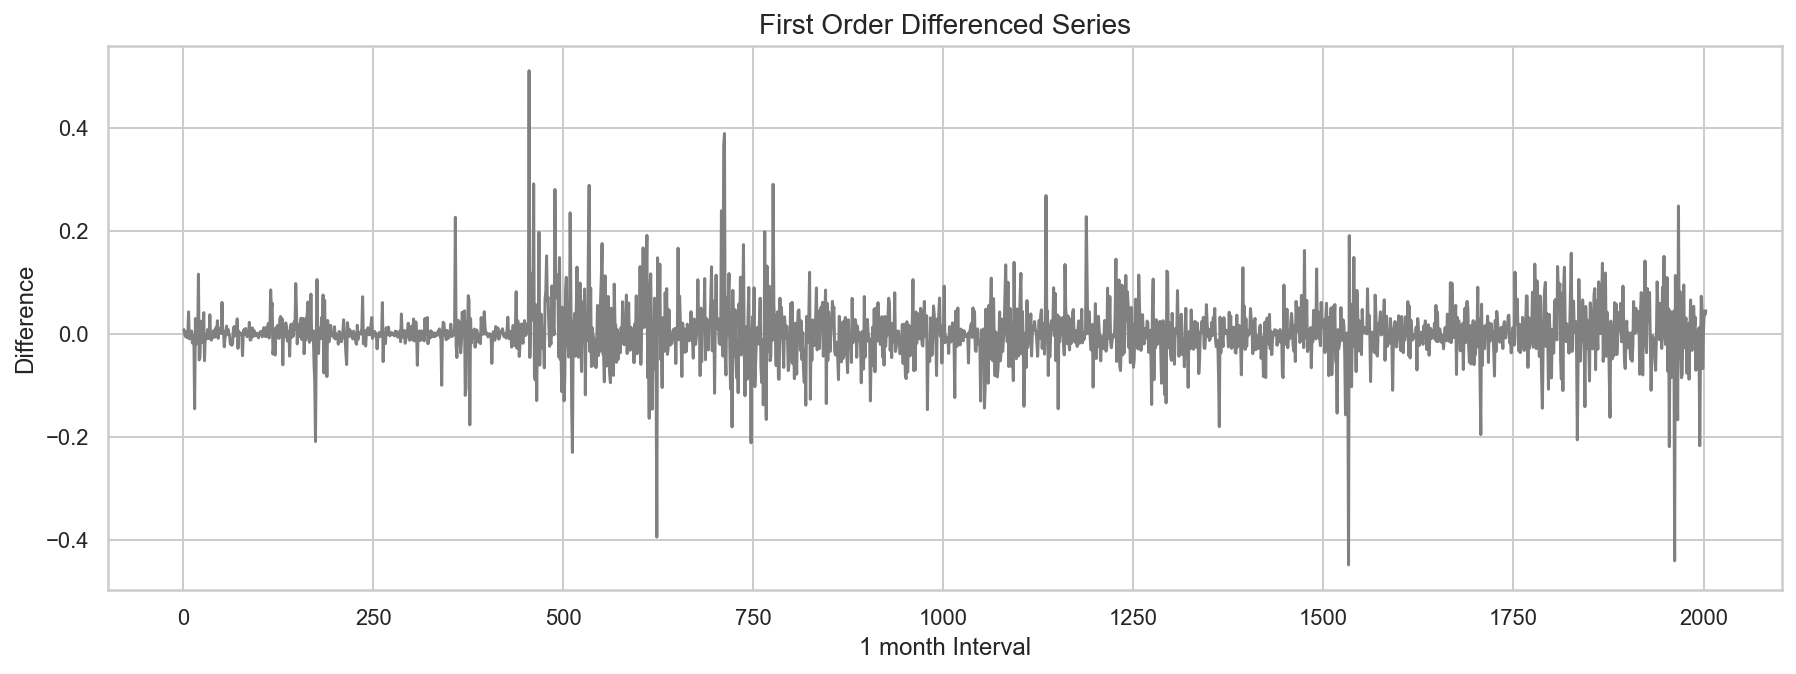

In [113]:
plt.figure(figsize=(15, 5))
plt.plot(LTC_stationary, color = 'grey')
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('1 month Interval', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

## Augmented Dickey-Fuller Test after difference time series

In [114]:
X = LTC_stationary["LTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -15.415183
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho - Time series in stationary


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) after difference time series

In [115]:
def kpss_test(LTC):
    statistic , p_value , n_lags, critical_values = kpss(LTC_stationary['LTC-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series in stationary")
        
        
kpss_test(LTC_stationary)

 KPSS Statistics:0.08697544009090857
 p-value: 0.1
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Reject Ho - Time series in stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# ETH-USD

In [116]:
ETH = df[['ETH-USD Adj Close']]
ETHlog = np.log(ETH)
ETHlog

ETH-USD Adj Close
0             -0.068769
1             -0.053375
2             -0.064940
3             -0.028497
4             -0.046589
...                 ...
1999           7.502858
2000           7.511655
2001           7.590294
2002           7.639958
2003           7.678219

[2004 rows x 1 columns]

Text(0.5, 1.0, 'ETH-USD Adj Close')

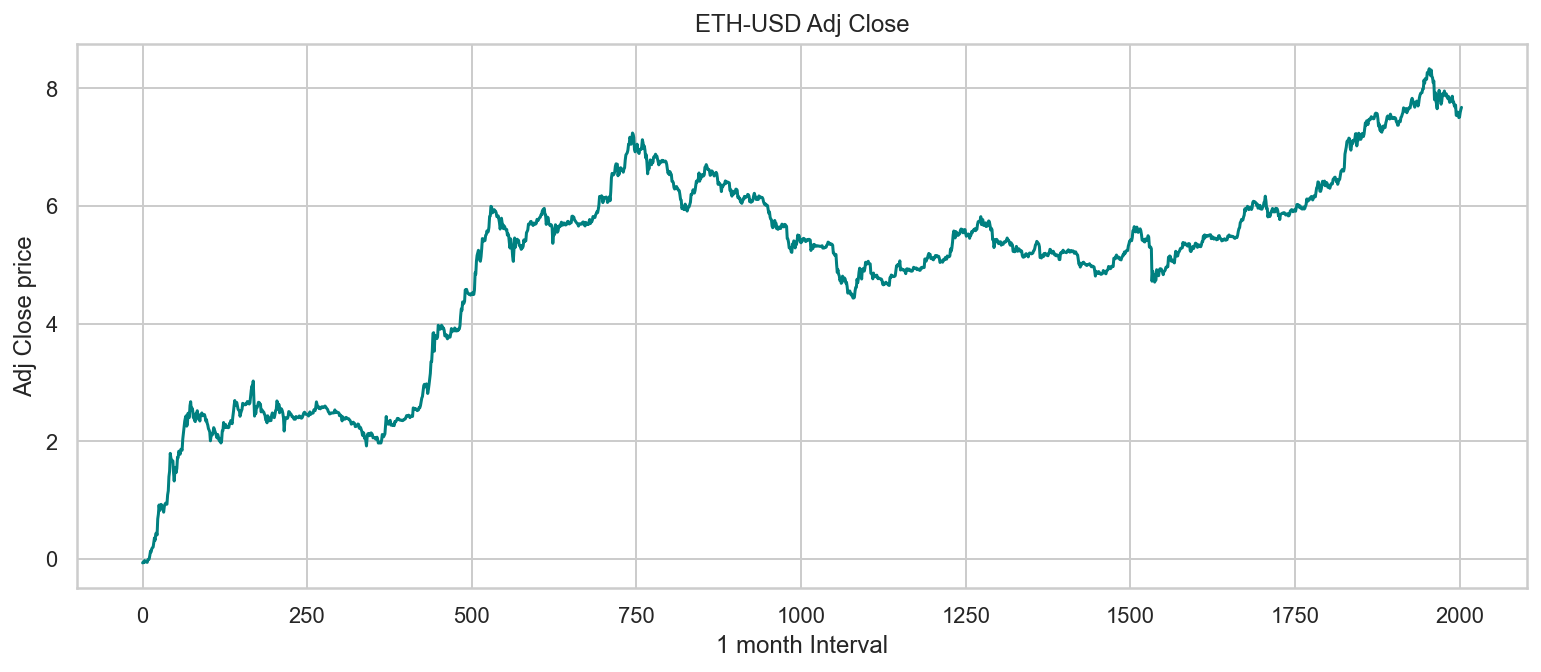

In [117]:
ETHlog['ETH-USD Adj Close'].plot(figsize=(13,5), color = 'teal')
plt.xlabel("1 month Interval")
plt.ylabel("Adj Close price")
plt.title("ETH-USD Adj Close")

## Augmented Dickey- Fuller Test ETH-USD Adj Close

In [118]:
#Augmented Dickey-Filler Test - 
X = ETHlog["ETH-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series is stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -2.310804
p-value: 0.168507
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [119]:
def kpss_test(ETH):
    statistic , p_value , n_lags, critical_values = kpss(ETHlog['ETH-USD Adj Close'],'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
         print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series in stationary")
kpss_test(ETH)

 KPSS Statistics:0.9628773869203552
 p-value: 0.01
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Failed to Reject Ho - Time Series is Non-Stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## Difference time series ETH-USD

In [120]:
ETH_stationary = ETHlog.diff().dropna()
ETH_stationary

ETH-USD Adj Close
1              0.015394
2             -0.011564
3              0.036442
4             -0.018091
5             -0.004519
...                 ...
1999          -0.092256
2000           0.008797
2001           0.078638
2002           0.049665
2003           0.038261

[2003 rows x 1 columns]

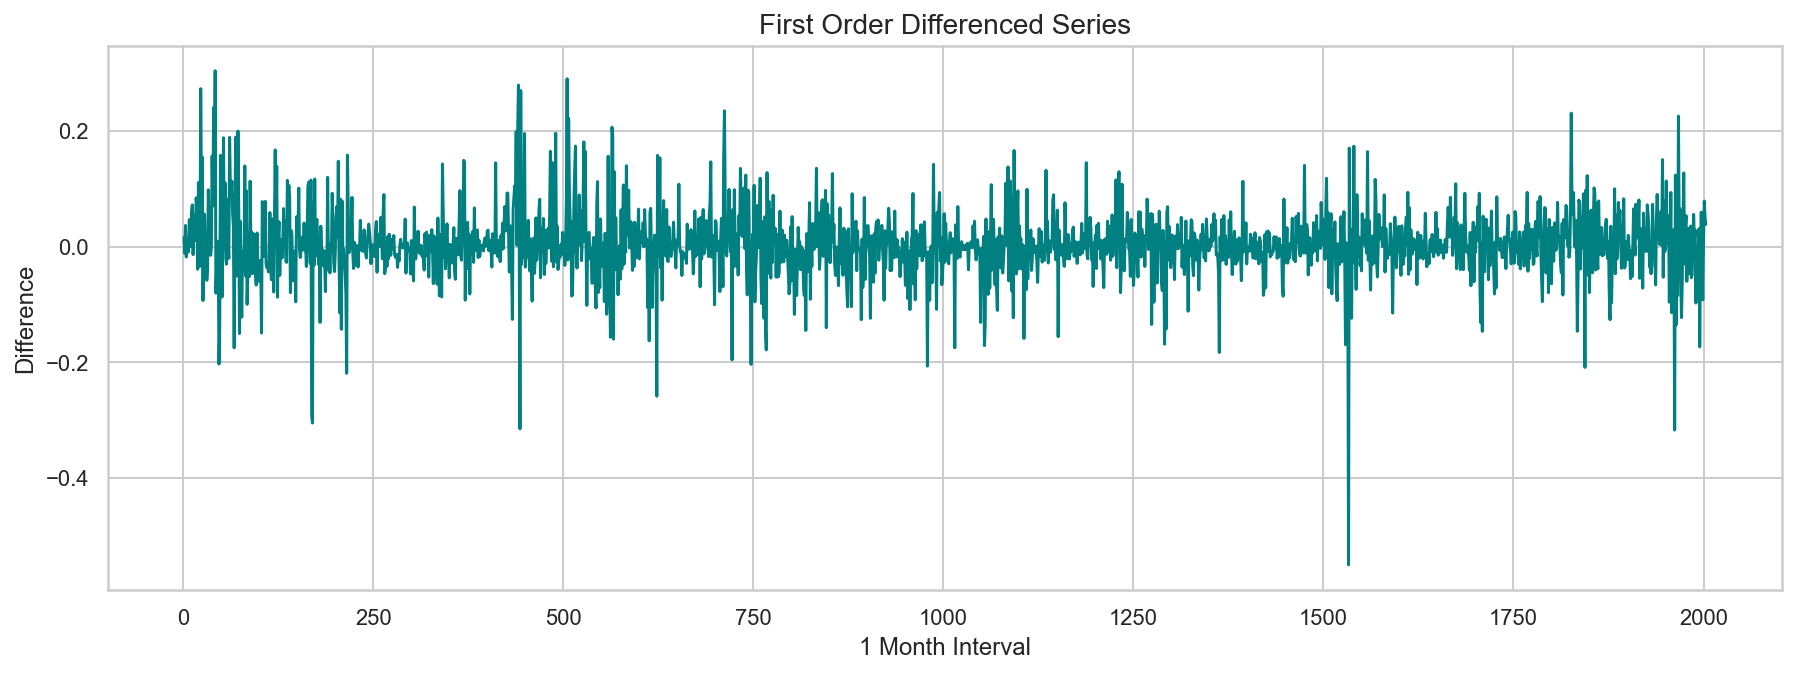

In [121]:
plt.figure(figsize=(15, 5))
plt.plot(ETH_stationary, color = 'teal')
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('1 Month Interval', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

# Augmented Dickey-Filler Test after first difference

In [122]:
X = ETH_stationary["ETH-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series is stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -8.034097
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho - Time series is stationary


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) after difference time series

In [123]:
def kpss_test(ETH):
    statistic , p_value , n_lags, critical_values = kpss(ETH_stationary['ETH-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series is stationary")
        
        
kpss_test(ETH_stationary)

 KPSS Statistics:0.18124490319025496
 p-value: 0.023033161303654386
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Failed to Reject Ho - Time Series is Non-Stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


# DOGE-USD

In [125]:
DOGE = df[['DOGE-USD Adj Close']]
DOGElog = np.log(DOGE)
DOGElog

DOGE-USD Adj Close
0              -8.798231
1              -8.778558
2              -8.798231
3              -8.831904
4              -8.845697
...                  ...
1999           -1.430652
2000           -1.407379
2001           -1.330103
2002           -1.359236
2003           -1.336480

[2004 rows x 1 columns]

Text(0.5, 1.0, 'DOGE-USD Adj Close')

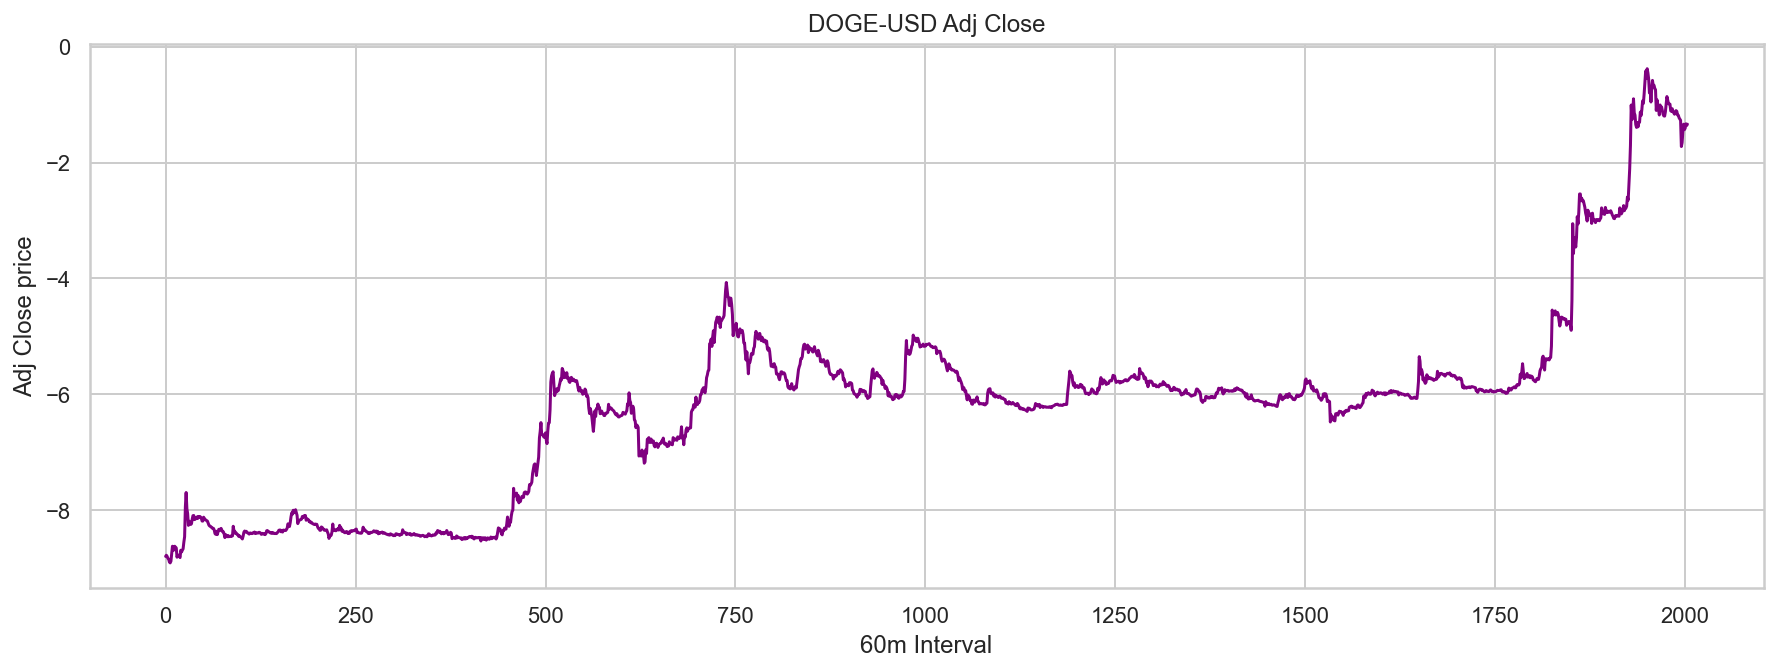

In [126]:
DOGElog['DOGE-USD Adj Close'].plot(figsize=(15,5),color = 'purple')
plt.xlabel("60m Interval")
plt.ylabel("Adj Close price")
plt.title("DOGE-USD Adj Close")

# Augmented Dickey Fuller Test DOGE-USD

In [127]:
X = DOGElog["DOGE-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -0.325049
p-value: 0.921881
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) DOGE-USD

In [128]:
def kpss_test(DOGE):
    statistic , p_value , n_lags, critical_values = kpss(DOGElog['DOGE-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
        
kpss_test(BTC)

 KPSS Statistics:0.5148675289575496
 p-value: 0.01
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Result: The series is not stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## Difference time series DOGE-USD

In [129]:
DOGE_stationary = DOGElog.diff().dropna()
DOGE_stationary

DOGE-USD Adj Close
1               0.019673
2              -0.019673
3              -0.033673
4              -0.013793
5              -0.049832
...                  ...
1999           -0.094221
2000            0.023273
2001            0.077276
2002           -0.029133
2003            0.022756

[2003 rows x 1 columns]

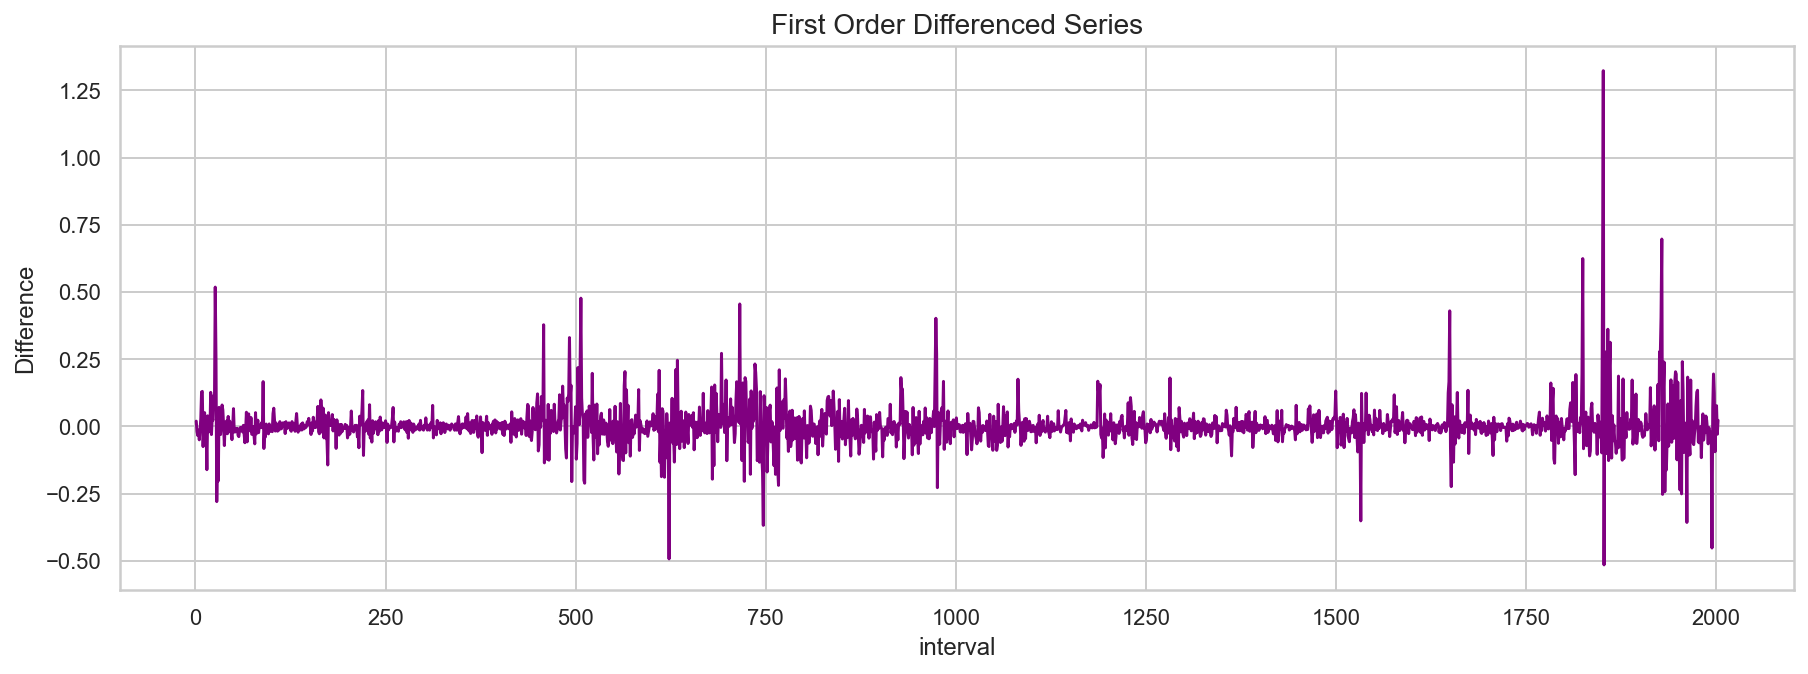

In [130]:
plt.figure(figsize=(15, 5))
plt.plot(DOGE_stationary, color = 'purple')
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('interval', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

## Augmented Dickey-Fuller Test after difference

In [132]:
X = DOGE_stationary["DOGE-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -7.699643
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho - Time series in stationary


  ## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) after difference time series

In [133]:
def kpss_test(BTC):
    statistic , p_value , n_lags, critical_values = kpss(DOGE_stationary['DOGE-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series in stationary")
        
kpss_test(BTC_stationary)

 KPSS Statistics:0.12198566909805875
 p-value: 0.09447098315174306
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Reject Ho - Time series in stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


# USDT-USD

In [134]:
USDT = df[['USDT-USD Adj Close']]
USDTlog = np.log(USDT)
USDTlog

USDT-USD Adj Close
0               0.000000
1               0.000000
2               0.000000
3               0.000000
4               0.000000
...                  ...
1999           -0.000155
2000            0.001213
2001            0.000642
2002           -0.000072
2003            0.000024

[2004 rows x 1 columns]

Text(0.5, 1.0, 'USDT-USD Adj Close')

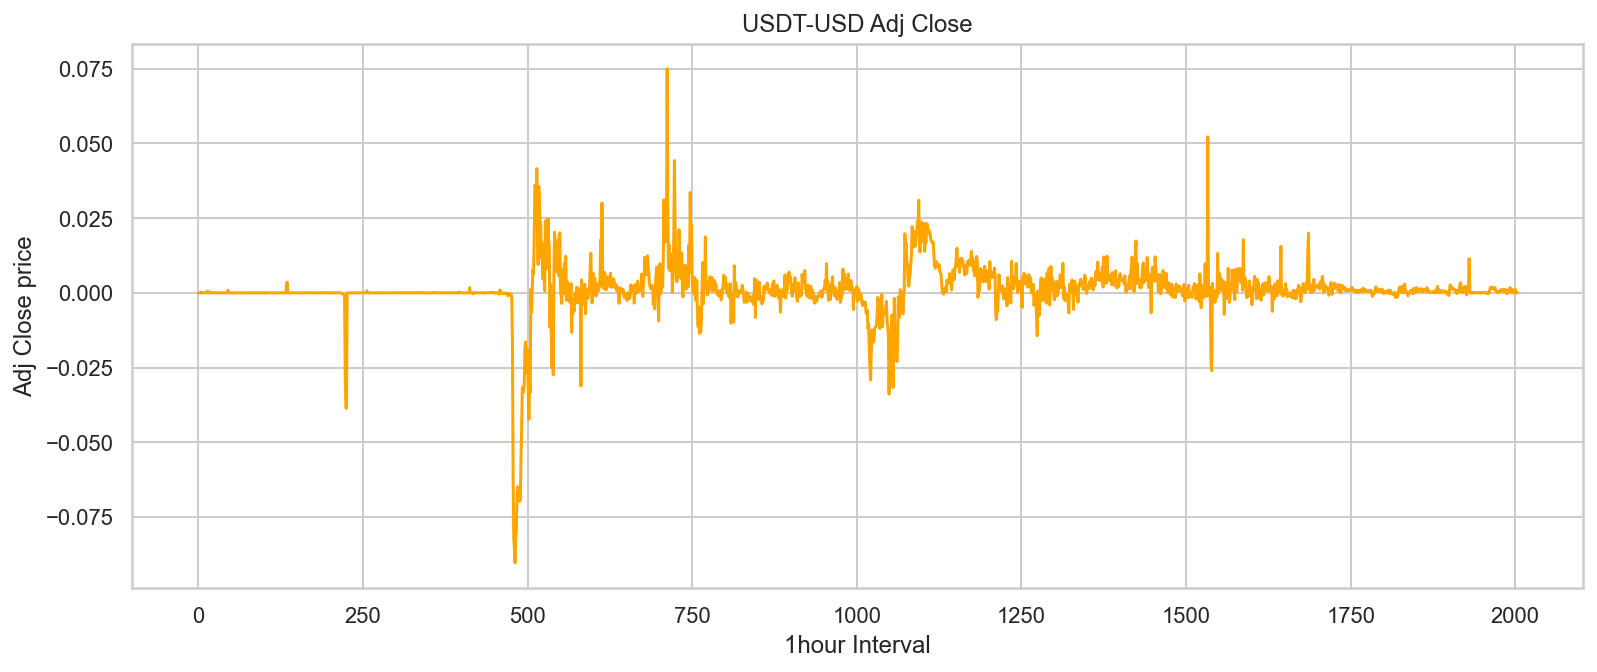

In [135]:
USDTlog['USDT-USD Adj Close'].plot(figsize=(13,5),color = 'orange')
plt.xlabel("1hour Interval")
plt.ylabel("Adj Close price")
plt.title("USDT-USD Adj Close")

## Augmented Dickey-Fuller Test - USDT_USD Adj Close

In [136]:
 X = USDTlog["USDT-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -8.764783
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho - Time series in stationary


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [137]:
def kpss_test(USDT):
    statistic , p_value , n_lags, critical_values = kpss(USDTlog['USDT-USD Adj Close'],'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series is stationary")
        
kpss_test(LTC)

 KPSS Statistics:0.08772496813055686
 p-value: 0.1
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Reject Ho - Time series is stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
